<a href="https://colab.research.google.com/github/pach28/Tokyo-Olympics-Econometric-Analysis/blob/main/Tokyo_Olympics_Econometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import libraries
# library for manipulating the csv data
import pandas as pd

# library for scientific calculations on numbers + linear algebra
import numpy as np

# library for regular plot visualizations
import matplotlib.pyplot as plt

# library for advanced plot visualizations
import seaborn as sns
from statsmodels.stats.diagnostic import kstest_normal
import scipy.stats as stats

#se cargan las bases de datos de la tabla de abajo
#Todo del año 2020 para los juegos olimpicos de tokio 2020-2021

\
\begin{array}{|c|l|}
\hline
\textbf{Variable} & \textbf{Description} \\ \hline
\text{GDP} & \text{Gross Domestic Product} \\ \hline
\text{NU} & \text{Population} \\ \hline
\text{MS} & \text{Medal Share} \\ \hline
\text{ATL} & \text{Number of athletes for each country} \\ \hline
\text{OLP} & \text{Percentage of Population over 65} \\ \hline
\text{URP} & \text{Percentage of Urban Population} \\ \hline
\text{MEX} & \text{Percentage of Military Expenditure of GDP} \\ \hline
\text{EEX} & \text{Percentage of Education Expenditure of GDP} \\ \hline
\text{HEX} & \text{Percentage of Health Expenditure of GDP} \\ \hline
\text{LEP} & \text{Life Expectancy} \\ \hline
\text{CAS} & \text{Daily per capita Caloric Supply} \\ \hline
\text{DOC} & \text{Doctors per 1000 people} \\ \hline
\text{COR} & \text{Control Corruption Level} \\ \hline
\text{MED} & \text{Weighted Sum of Medals} \\ \hline
\text{log_MED} & \text{Log Weighted Sum of Medals} \\ \hline
\text{log_ATL} & \text{Log Number of athletes for each country} \\ \hline
\text{log_MS} & \text{Log Medal Share} \\ \hline
\text{log_GDP} & \text{Log Gross Domestic Product} \\ \hline
\text{log_NU} & \text{Log Population} \\ \hline
\end{array}



In [6]:
GDP = pd.read_excel('PIB 2020.xlsx') #Gross Domestic Product
NU = pd.read_excel('poblacion 2020.xlsx') #Population
MS = pd.read_excel('medallero tokio 2020.xlsx') #Medal Share
MS = MS.rename(columns={'País': 'Country'})
NU = NU.rename(columns={'COI': 'Country','2020':'Population'})
ATL = pd.read_excel('atletas tokio 2020.xlsx') #Number of Athlete representing each country
ATL.columns=['Pais','Country','Athlete']
OLP = pd.read_excel('poblacion+65 2020.xlsx') #Population over 65 (%)
OLP = OLP.rename(columns={'COI': 'Country','2020': 'Pop over 65'})
URP = pd.read_excel('poblacion urbana 2020.xlsx') #Urban population (%)
URP = URP.rename(columns={'COI': 'Country','2020':'Urban Pop'})
MEX = pd.read_excel('gasto militar 2020.xlsx') #Military Expenditure (%)
MEX = MEX.rename(columns={'COI': 'Country','2020':'Military %'})
EEX = pd.read_excel('gasto educacion 2020.xlsx') #Education Expenditure (%)
EEX = EEX.rename(columns={'COI': 'Country','2020':'Education %'})
HEX = pd.read_excel('gasto en salud 2020.xlsx') #Health Expenditure (%)
HEX = HEX.rename(columns={'COI': 'Country','2020':'Health %'})
LEP = pd.read_excel('esperanza de vida 2020.xlsx') #Life Expectancy
LEP = LEP.rename(columns={'COI': 'Country','2020':'Life E'})
CAS = pd.read_excel('daily-per-capita-caloric-supply 2020.xlsx') #Daily per-capita caloric supply
CAS = CAS.rename(columns={'COI': 'Country'})
DOC = pd.read_excel('doctors-per-1000-people 2020.xlsx') #Doctors pero 1000 people
DOC = DOC.rename(columns={'COI': 'Country'})
COR = pd.read_excel('persepcion de corrupcion 2020.xlsx') #Corruption Control level
COR = COR.rename(columns={'COI': 'Country','2020':'Corruption'})

MED, measured as a weighted sum of the number of
gold, silver and bronze medals won, with weights of 0.6, 0.3 and 0.1 respectively

In [7]:
MS['MED'] = MS['oro']*0.6 + MS['plata']*0.3 + MS['bronce']*0.1
MS['log_Med'] = np.log(MS['MED'])

#Ajustamos las bases de bases de datos para que coincidan los paises del medallero, dropeando columnas y filtrando, asi como ordenando por orden ascendente

In [8]:
# Drop rows with missing values
ATL_adjust = ATL.dropna()
OLP_adjust = OLP.dropna()
URP_adjust = URP.dropna()
MEX_adjust = MEX.dropna()
EEX_adjust = EEX.dropna()
HEX_adjust = HEX.dropna()
LEP_adjust = LEP.dropna()
CAS_adjust = CAS.dropna()
DOC_adjust = DOC.dropna()
COR_adjust = COR.dropna()
# Filter pib_df to only include countries present in medallero_df
ATL_adjust = ATL_adjust[ATL_adjust['Country'].isin(MS['Country'])]
OLP_adjust = OLP_adjust[OLP_adjust['Country'].isin(MS['Country'])]
URP_adjust = URP_adjust[URP_adjust['Country'].isin(MS['Country'])]
MEX_adjust = MEX_adjust[MEX_adjust['Country'].isin(MS['Country'])]
EEX_adjust = EEX_adjust[EEX_adjust['Country'].isin(MS['Country'])]
HEX_adjust = HEX_adjust[HEX_adjust['Country'].isin(MS['Country'])]
LEP_adjust = LEP_adjust[LEP_adjust['Country'].isin(MS['Country'])]
CAS_adjust = CAS_adjust[CAS_adjust['Country'].isin(MS['Country'])]
DOC_adjust = DOC_adjust[DOC_adjust['Country'].isin(MS['Country'])]
COR_adjust = COR_adjust[COR_adjust['Country'].isin(MS['Country'])]
# Sort the filtered DataFrame in descending order
ATL_adjust = ATL_adjust.sort_values('Athlete', ascending=False, ignore_index=True)
OLP_adjust = OLP_adjust.sort_values('Pop over 65', ascending=False, ignore_index=True)
URP_adjust = URP_adjust.sort_values('Urban Pop', ascending=False, ignore_index=True)
MEX_adjust = MEX_adjust.sort_values('Military %', ascending=False, ignore_index=True)
EEX_adjust = EEX_adjust.sort_values('Education %', ascending=False, ignore_index=True)
HEX_adjust = HEX_adjust.sort_values('Health %', ascending=False, ignore_index=True)
LEP_adjust = LEP_adjust.sort_values('Life E', ascending=False, ignore_index=True)
CAS_adjust = CAS_adjust.sort_values('calorias per capita per dia', ascending=False, ignore_index=True)
DOC_adjust = DOC_adjust.sort_values('Physicians (per 1,000 people)', ascending=False, ignore_index=True)
COR_adjust = COR_adjust.sort_values('Corruption', ascending=False, ignore_index=True)
# Remove columns but 'Country' and the data
ATL_adjust = ATL_adjust.drop('Pais',axis=1)
OLP_adjust = OLP_adjust.drop(['Country Code','Country Name'],axis=1)
URP_adjust = URP_adjust.drop(['Country Code','Country Name'],axis=1)
MEX_adjust = MEX_adjust.drop(['Country Code','Country Name'],axis=1)
EEX_adjust = EEX_adjust.drop(['Country Code','Country Name'],axis=1)
HEX_adjust = HEX_adjust.drop(['Country Code','Country Name'],axis=1)
LEP_adjust = LEP_adjust.drop(['Country Code','Country Name'],axis=1)
CAS_adjust = CAS_adjust.drop(['Name','Code'],axis=1)
DOC_adjust = DOC_adjust.drop(['Entity','Code'],axis=1)
COR_adjust = COR_adjust.drop(['Country Code','Country Name'],axis=1)

#revisamos el numero de filas que coincidieron con el medallero, para saber que variables se podran usar

In [9]:
#numero de filas de ms
print(MS.shape[0],ATL_adjust.shape[0],OLP_adjust.shape[0],URP_adjust.shape[0],MEX_adjust.shape[0],EEX_adjust.shape[0],HEX_adjust.shape[0],LEP_adjust.shape[0],CAS_adjust.shape[0],DOC_adjust.shape[0],COR_adjust.shape[0])

93 93 88 88 77 75 84 87 85 48 88


In [10]:
#agregar columna de log
ATL_adjust['log_Athlete'] = np.log(ATL_adjust['Athlete'])
MS['log_Medals'] = np.log(MS['Total'])

#pruebas de ajuste de datos para replicar los resultados del articulo seleccionado

In [11]:
'''
# Rename columns
GDP_adjust = GDP.drop(columns=['Country Code'])
GDP_adjust = GDP_adjust.rename(columns={'2020': 'GDP', 'COI': 'Country'})

# Drop rows with missing values
GDP_adjust = GDP_adjust.dropna()

# Filter pib_df to only include countries present in medallero_df
GDP_adjust = GDP_adjust[GDP_adjust['Country'].isin(MS['Country'].head(21))]

# Sort the filtered DataFrame in descending order of GDP
GDP_adjust = GDP_adjust.sort_values('GDP', ascending=False, ignore_index=True)
#GDP_adjust
'''

"\n# Rename columns\nGDP_adjust = GDP.drop(columns=['Country Code'])\nGDP_adjust = GDP_adjust.rename(columns={'2020': 'GDP', 'COI': 'Country'})\n\n# Drop rows with missing values\nGDP_adjust = GDP_adjust.dropna()\n\n# Filter pib_df to only include countries present in medallero_df\nGDP_adjust = GDP_adjust[GDP_adjust['Country'].isin(MS['Country'].head(21))]\n\n# Sort the filtered DataFrame in descending order of GDP\nGDP_adjust = GDP_adjust.sort_values('GDP', ascending=False, ignore_index=True)\n#GDP_adjust\n"

#Se ajusta el GDP para coincidir con las pruebas del articulo

In [12]:
GDP_adjust = GDP.drop(columns=['Country Code'])
GDP_adjust = GDP_adjust.rename(columns={'2020': 'GDP', 'COI': 'Country'})

# Drop rows with missing values
GDP_adjust = GDP_adjust.dropna()
# Sort the filtered DataFrame in descending order of GDP
GDP_adjust = GDP_adjust.sort_values('GDP', ascending=False, ignore_index=True)
#GDP_adjust.head(20)

#solo se usaron 21 datos en orden para las pruebas de poblacion en el articulo

In [13]:
# Rename columns
NU_adjust = NU.drop(columns=['Country Code','Country Name'])
NU_adjust = NU_adjust.rename(columns={'2020': 'Population', 'COI': 'Country'})

# Drop rows with missing values
NU_adjust = NU_adjust.dropna()

# Filter pib_df to only include countries present in medallero_df
NU_adjust = NU_adjust[NU_adjust['Country'].isin(MS['Country'].head(21))]
# Sort the filtered DataFrame in descending order of GDP
NU_adjust = NU_adjust.sort_values('Population', ascending=False, ignore_index=True)
#NU_adjust

In [14]:
'''
# Rename columns
NU_adjust = NU.drop(columns=['Country Code'])
NU_adjust = NU_adjust.rename(columns={'2020': 'Population', 'COI': 'Country'})

# Drop rows with missing values
NU_adjust = NU_adjust.dropna()
# Sort the filtered DataFrame in descending order of GDP
NU_adjust = NU_adjust.sort_values('Population', ascending=False, ignore_index=True)
NU_adjust.head(20)
'''

"\n# Rename columns\nNU_adjust = NU.drop(columns=['Country Code'])\nNU_adjust = NU_adjust.rename(columns={'2020': 'Population', 'COI': 'Country'})\n\n# Drop rows with missing values\nNU_adjust = NU_adjust.dropna()\n# Sort the filtered DataFrame in descending order of GDP\nNU_adjust = NU_adjust.sort_values('Population', ascending=False, ignore_index=True)\nNU_adjust.head(20)\n"

#agregamos las variables modificadas de la tabla del inicio

In [15]:
#Sacamos el log
GDP_adjust['log_GDP'] = np.log(GDP_adjust['GDP'])
#GDP_adjust

In [16]:
NU_adjust['log_Population'] = np.log(NU_adjust['Population'])
#NU_adjust
NU['log_Population'] = np.log(NU['Population'])

#instalamos paqueteria para hacer las pruebas de normalidad de datos

In [17]:
# el siguiente código es necesario para instalar correctamente el paquete Pingouin
!pip uninstall scipy -y
!pip uninstall pingouin -y
!pip install pingouin
import pingouin as pg

Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 14.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


#Pruebas de normalidad log(GSYIH) o log(GDP)

In [18]:
# Aplicar la prueba de Kolmogorov-Smirnov
statistic, p_value = kstest_normal(GDP_adjust['log_GDP'].head(20))

# Imprimir resultados
print(f'Estadístico de prueba: {statistic:.3f}')
print(f'P-valor: {p_value:.3f}')

Estadístico de prueba: 0.179
P-valor: 0.088


In [19]:
# Test de normalidad Shapiro-Wilk
shapiro_test_log_GDP = pg.normality(GDP_adjust['log_GDP'].head(20))
shapiro_test_log_GDP

,W,pval,normal
log_GDP,0.866546,0.010222,False


In [20]:
jarque_bera_test_log_GDP = pg.normality(GDP_adjust['log_GDP'].head(20), method='normaltest')
jarque_bera_test_log_GDP

,W,pval,normal
log_GDP,8.73739,0.012668,False


#Pruebas normalidad log(NU)

In [21]:
# Aplicar la prueba de Kolmogorov-Smirnov
statistic, p_value = kstest_normal(NU_adjust['log_Population'])

# Imprimir resultados
print(f'Estadístico de prueba: {statistic:.3f}')
print(f'P-valor: {p_value:.3f}')

Estadístico de prueba: 0.122
P-valor: 0.560


In [22]:
#realizamos las mismas pruebas para MS y NU
shapiro_test_log_population = pg.normality(NU_adjust['log_Population'])
shapiro_test_log_population

,W,pval,normal
log_Population,0.970043,0.733998,True


In [23]:
jarque_bera_test_log_NU = pg.normality(NU_adjust['log_Population'], method='normaltest')
jarque_bera_test_log_NU

,W,pval,normal
log_Population,1.90685,0.385419,True


#Pruebas normalidad log(MS)

In [24]:

# Aplicar la prueba de Kolmogorov-Smirnov
statistic, p_value = kstest_normal(MS['log_Medals'].head(21))

# Imprimir resultados
print(f'Estadístico de prueba: {statistic:.3f}')
print(f'P-valor: {p_value:.3f}')

Estadístico de prueba: 0.180
P-valor: 0.072


In [25]:
shapiro_test_log_medals = pg.normality(MS['log_Medals'].head(21))
shapiro_test_log_medals

,W,pval,normal
log_Medals,0.930086,0.138202,True


In [26]:
jarque_bera_test_log_medals = pg.normality(MS['log_Medals'].head(21), method='normaltest')
jarque_bera_test_log_medals

,W,pval,normal
log_Medals,2.191178,0.334343,True


#estas pruebas son de las variables extra que no estan en el articulo

#Test de normalidad kolmogorov

In [27]:
# Aplicar la prueba de Kolmogorov-Smirnov de cada variable extra
#log_athlete
statistic, p_value = kstest_normal(ATL_adjust['log_Athlete'])
print(f'Estadístico de prueba log_athlete: {statistic:.3f}')
print(f'P-valor log_athlete: {p_value:.3f}')
#olp_adjust
statistic, p_value = kstest_normal(OLP_adjust['Pop over 65'])
print(f'Estadístico de prueba Pop over 65: {statistic:.3f}')
print(f'P-valor Pop over 65: {p_value:.3f}')
#URP_adjust
statistic, p_value = kstest_normal(URP_adjust['Urban Pop'])
print(f'Estadístico de prueba Urban Pop: {statistic:.3f}')
print(f'P-valor Urban Pop: {p_value:.3f}')
#MEX_adjust
statistic, p_value = kstest_normal(MEX_adjust['Military %'])
print(f'Estadístico de prueba Military %: {statistic:.3f}')
print(f'P-valor Military %: {p_value:.3f}')
#EEX_adjust
statistic, p_value = kstest_normal(EEX_adjust['Education %'])
print(f'Estadístico de prueba Education %: {statistic:.3f}')
print(f'P-valor Education %: {p_value:.3f}')
#HEX_adjust
statistic, p_value = kstest_normal(HEX_adjust['Health %'])
print(f'Estadístico de prueba Health %: {statistic:.3f}')
print(f'P-valor Health %: {p_value:.3f}')
#Lep_adjust
statistic, p_value = kstest_normal(LEP_adjust['Life E'])
print(f'Estadístico de prueba Life E: {statistic:.3f}')
print(f'P-valor Life E: {p_value:.3f}')
#CAS_adjust
statistic, p_value = kstest_normal(CAS_adjust['calorias per capita per dia'])
print(f'Estadístico de prueba calorias per capita per dia: {statistic:.3f}')
print(f'P-valor calorias per capita per dia: {p_value:.3f}')
#Doc_adjust
statistic, p_value = kstest_normal(DOC_adjust['Physicians (per 1,000 people)'])
print(f'Estadístico de prueba Physicians (per 1,000 people): {statistic:.3f}')
print(f'P-valor Physicians (per 1,000 people): {p_value:.3f}')
#COR_adjust
statistic, p_value = kstest_normal(COR_adjust['Corruption'])
print(f'Estadístico de prueba Corruption: {statistic:.3f}')
print(f'P-valor Corruption: {p_value:.3f}')
#MED
statistic, p_value = kstest_normal(MS['MED'])
print(f'Estadístico de prueba MED: {statistic:.3f}')
print(f'P-valor MED: {p_value:.3f}')
#log_MED
statistic, p_value = kstest_normal(MS['log_Med'])
print(f'Estadístico de prueba log_Med: {statistic:.3f}')
print(f'P-valor log_Med: {p_value:.3f}')

Estadístico de prueba log_athlete: 0.052
P-valor log_athlete: 0.800
Estadístico de prueba Pop over 65: 0.135
P-valor Pop over 65: 0.001
Estadístico de prueba Urban Pop: 0.085
P-valor Urban Pop: 0.151
Estadístico de prueba Military %: 0.186
P-valor Military %: 0.001
Estadístico de prueba Education %: 0.098
P-valor Education %: 0.098
Estadístico de prueba Health %: 0.089
P-valor Health %: 0.143
Estadístico de prueba Life E: 0.084
P-valor Life E: 0.180
Estadístico de prueba calorias per capita per dia: 0.122
P-valor calorias per capita per dia: 0.005
Estadístico de prueba Physicians (per 1,000 people): 0.106
P-valor Physicians (per 1,000 people): 0.204
Estadístico de prueba Corruption: 0.116
P-valor Corruption: 0.008
Estadístico de prueba MED: 0.295
P-valor MED: 0.001
Estadístico de prueba log_Med: 0.073
P-valor log_Med: 0.294


#pruebas shapiro

In [28]:
#shapiro test para las variables extra
shapiro_test_log_athlete = pg.normality(ATL_adjust['log_Athlete'])
print(shapiro_test_log_athlete)
shapiro_test_olp_adjust = pg.normality(OLP_adjust['Pop over 65'])
print(shapiro_test_olp_adjust)
shapiro_test_URP_adjust = pg.normality(URP_adjust['Urban Pop'])
print(shapiro_test_URP_adjust)
shapiro_test_MEX_adjust = pg.normality(MEX_adjust['Military %'])
print(shapiro_test_MEX_adjust)
shapiro_test_EEX_adjust = pg.normality(EEX_adjust['Education %'])
print(shapiro_test_EEX_adjust)
shapiro_test_HEX_adjust = pg.normality(HEX_adjust['Health %'])
print(shapiro_test_HEX_adjust)
shapiro_test_LEP_adjust = pg.normality(LEP_adjust['Life E'])
print(shapiro_test_LEP_adjust)
shapiro_test_CAS_adjust = pg.normality(CAS_adjust['calorias per capita per dia'])
print(shapiro_test_CAS_adjust)
shapiro_test_DOC_adjust = pg.normality(DOC_adjust['Physicians (per 1,000 people)'])
print(shapiro_test_DOC_adjust)
shapiro_test_COR_adjust = pg.normality(COR_adjust['Corruption'])
print(shapiro_test_COR_adjust)
shapiro_test_MED = pg.normality(MS['MED'])
print(shapiro_test_MED)
shapiro_test_log_MED = pg.normality(MS['log_Med'])
print(shapiro_test_log_MED)

                    W      pval  normal
log_Athlete  0.986616  0.465268    True
                    W      pval  normal
Pop over 65  0.923254  0.000063   False
                  W      pval  normal
Urban Pop  0.970357  0.041136   False
                   W          pval  normal
Military %  0.817075  2.333929e-08   False
                    W      pval  normal
Education %  0.964548  0.033912   False
                 W      pval  normal
Health %  0.953888  0.004402   False
               W      pval  normal
Life E  0.947912  0.001555   False
                                    W      pval  normal
calorias per capita per dia  0.960227  0.010235   False
                                      W      pval  normal
Physicians (per 1,000 people)  0.959583  0.097114    True
                   W      pval  normal
Corruption  0.962694  0.012411   False
            W          pval  normal
MED  0.535185  1.134108e-15   False
                W      pval  normal
log_Med  0.977928  0.116531    True


#pruebas jarque bera

In [29]:
jarque_bera_test_log_athlete = pg.normality(ATL_adjust['log_Athlete'], method='normaltest')
print(jarque_bera_test_log_athlete)
jarque_bera_test_olp_adjust = pg.normality(OLP_adjust['Pop over 65'], method='normaltest')
print(jarque_bera_test_olp_adjust)
jarque_bera_test_URP_adjust = pg.normality(URP_adjust['Urban Pop'], method='normaltest')
print(jarque_bera_test_URP_adjust)
jarque_bera_test_MEX_adjust = pg.normality(MEX_adjust['Military %'], method='normaltest')
print(jarque_bera_test_MEX_adjust)
jarque_bera_test_EEX_adjust = pg.normality(EEX_adjust['Education %'], method='normaltest')
print(jarque_bera_test_EEX_adjust)
jarque_bera_test_HEX_adjust = pg.normality(HEX_adjust['Health %'], method='normaltest')
print(jarque_bera_test_HEX_adjust)
jarque_bera_test_LEP_adjust = pg.normality(LEP_adjust['Life E'], method='normaltest')
print(jarque_bera_test_LEP_adjust)
jarque_bera_test_CAS_adjust = pg.normality(CAS_adjust['calorias per capita per dia'], method='normaltest')
print(jarque_bera_test_CAS_adjust)
jarque_bera_test_DOC_adjust = pg.normality(DOC_adjust['Physicians (per 1,000 people)'], method='normaltest')
print(jarque_bera_test_DOC_adjust)
jarque_bera_test_COR_adjust = pg.normality(COR_adjust['Corruption'], method='normaltest')
print(jarque_bera_test_COR_adjust)
jarque_bera_test_MED = pg.normality(MS['MED'], method='normaltest')
print(jarque_bera_test_MED)
jarque_bera_test_log_MED = pg.normality(MS['log_Med'], method='normaltest')
print(jarque_bera_test_log_MED)

                    W      pval  normal
log_Athlete  0.917786  0.631983    True
                     W          pval  normal
Pop over 65  47.348494  5.228838e-11   False
                 W      pval  normal
Urban Pop  3.17363  0.204576    True
                    W          pval  normal
Military %  46.604361  7.585630e-11   False
                    W      pval  normal
Education %  9.245176  0.009827   False
                 W      pval  normal
Health %  9.121677  0.010453   False
                W      pval  normal
Life E  11.531484  0.003133   False
                                    W      pval  normal
calorias per capita per dia  4.608919  0.099813    True
                                      W     pval  normal
Physicians (per 1,000 people)  1.032482  0.59676    True
                   W      pval  normal
Corruption  6.147211  0.046254   False
             W          pval  normal
MED  93.916894  4.038366e-21   False
                W      pval  normal
log_Med  0.076994  0.962235 

#ademas de las pruebas, vemos los histogramas de las variables

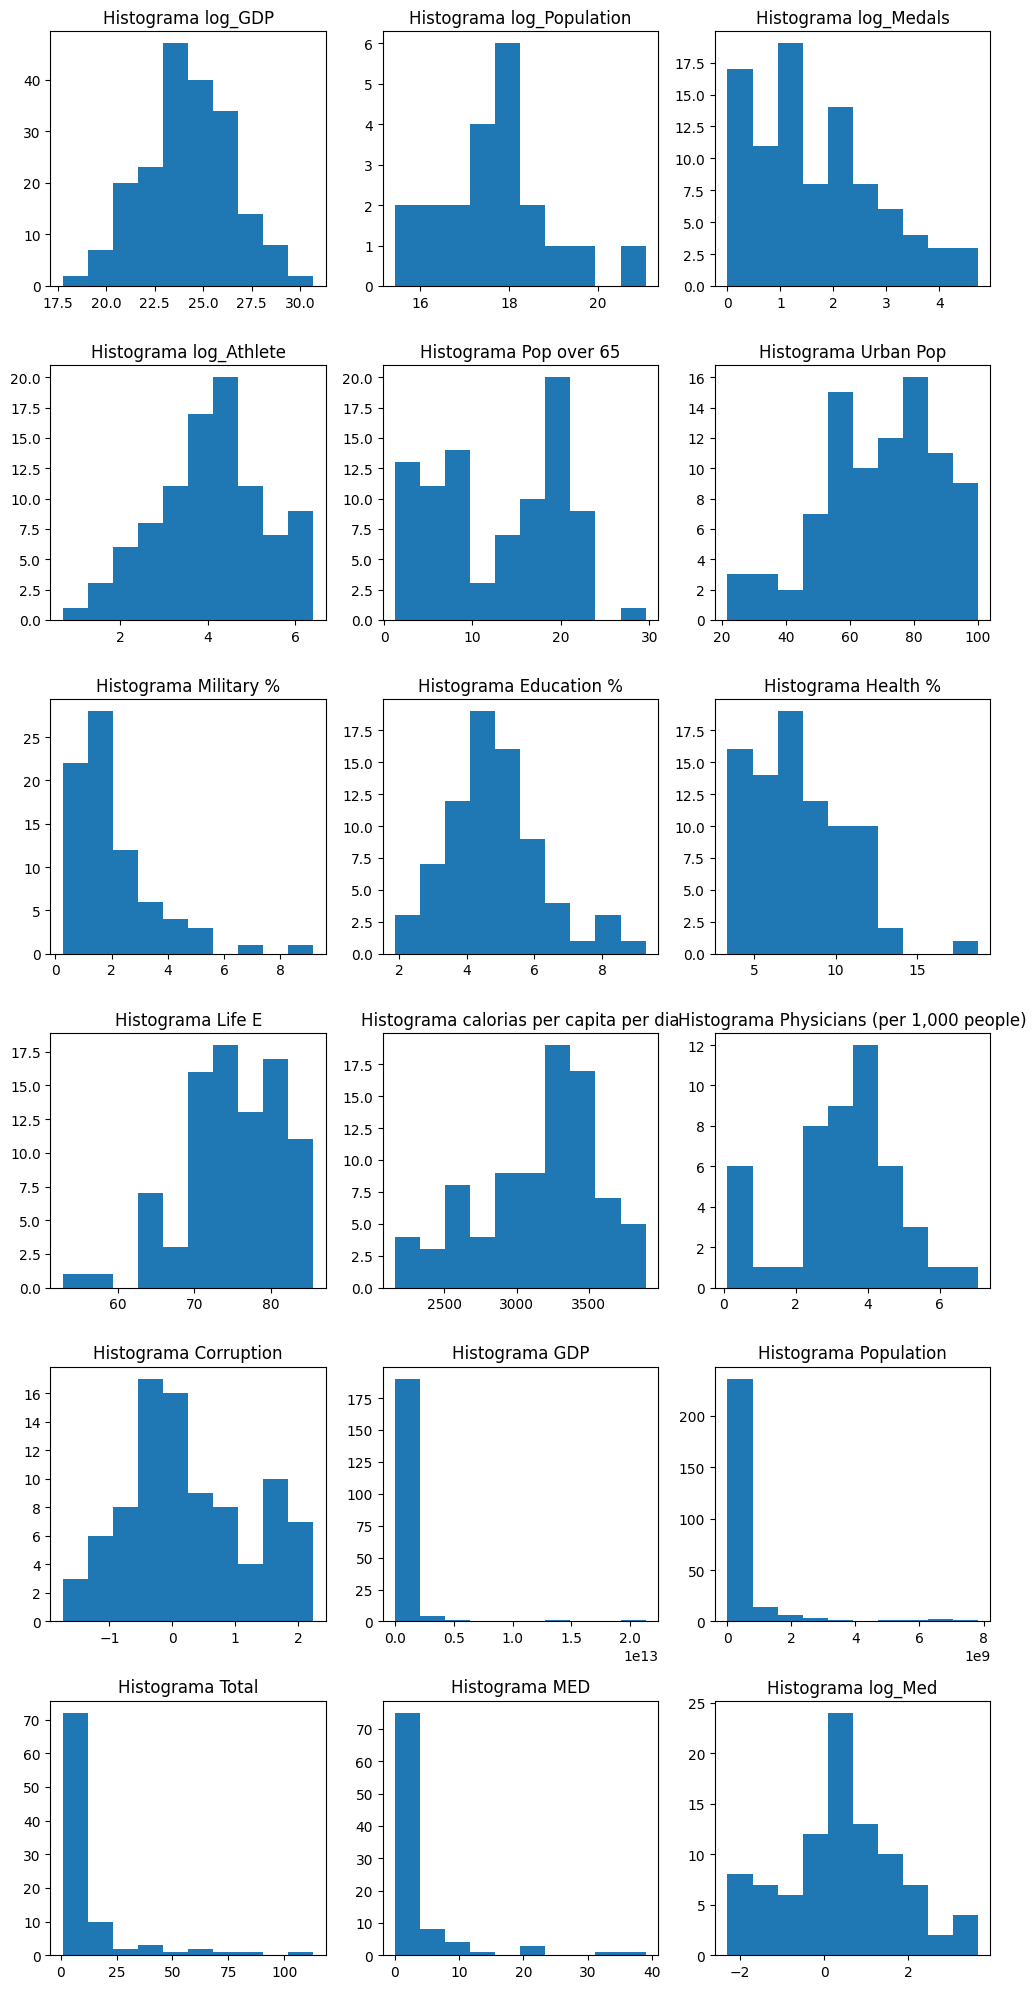

In [30]:
#un histograma por cada variable extra
# Crear una figura con un conjunto de subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10, 20))
axes = axes.flatten()
#crear un histograma para cada variable de las pruebas de normalidad
ax = axes[0]
ax.hist(GDP_adjust['log_GDP'])
ax.set_title('Histograma log_GDP')
ax = axes[1]
ax.hist(NU_adjust['log_Population'])
ax.set_title('Histograma log_Population')
ax = axes[2]
ax.hist(MS['log_Medals'])
ax.set_title('Histograma log_Medals')
ax = axes[3]
ax.hist(ATL_adjust['log_Athlete'])
ax.set_title('Histograma log_Athlete')
ax = axes[4]
ax.hist(OLP_adjust['Pop over 65'])
ax.set_title('Histograma Pop over 65')
ax = axes[5]
ax.hist(URP_adjust['Urban Pop'])
ax.set_title('Histograma Urban Pop')
ax = axes[6]
ax.hist(MEX_adjust['Military %'])
ax.set_title('Histograma Military %')
ax = axes[7]
ax.hist(EEX_adjust['Education %'])
ax.set_title('Histograma Education %')
ax = axes[8]
ax.hist(HEX_adjust['Health %'])
ax.set_title('Histograma Health %')
ax = axes[9]
ax.hist(LEP_adjust['Life E'])
ax.set_title('Histograma Life E')
ax = axes[10]
ax.hist(CAS_adjust['calorias per capita per dia'])
ax.set_title('Histograma calorias per capita per dia')
ax = axes[11]
ax.hist(DOC_adjust['Physicians (per 1,000 people)'])
ax.set_title('Histograma Physicians (per 1,000 people)')
ax = axes[12]
ax.hist(COR_adjust['Corruption'])
ax.set_title('Histograma Corruption')
ax = axes[13]
ax.hist(GDP_adjust['GDP'])
ax.set_title('Histograma GDP')
ax= axes[14]
ax.hist(NU['Population'])
ax.set_title('Histograma Population')
ax= axes[15]
ax.hist(MS['Total'])
ax.set_title('Histograma Total')
ax = axes[16]
ax.hist(MS['MED'])
ax.set_title('Histograma MED')
ax = axes[17]
ax.hist(MS['log_Med'])
ax.set_title('Histograma log_Med')
# Ajustar los subplots
plt.tight_layout()
# Mostrar la figura
plt.show()


#Test de correlacion log_medals y log_ gdp como en el articulo

In [31]:
# Unir los DataFrames por la columna 'Country'
df_merged = pd.merge(GDP_adjust, MS, on='Country')
df_merged = pd.merge(df_merged, NU, on='Country')
df_merged = pd.merge(df_merged, ATL_adjust, on='Country')
# Realizar el test de correlación de Pearson entre log_GDP y log_Total
correlation = pg.corr(df_merged['log_GDP'].head(20), df_merged['log_Medals'].head(20), method='pearson')

correlation

,n,r,CI95%,p-val,BF10,power
pearson,20,0.639096,"[0.27, 0.84]",0.002417,20.187,0.889283


#se define el modelo de el articulo

In [32]:
regression = df_merged[['Country','log_GDP','log_Medals','log_Population']]

#correlacion entre las unicas variables del articulo

In [33]:
#regression sin la primera columna
regressionn = regression.drop(columns=['Country'])
regressionn.corr()

,log_GDP,log_Medals,log_Population
log_GDP,1.000000,0.700637,0.789861
log_Medals,0.700637,1.000000,0.501151
log_Population,0.789861,0.501151,1.000000


#summary del modelo del articulo

In [34]:
import statsmodels.formula.api as smf

# Ajustar el modelo de regresión lineal multivariada
model = smf.ols('log_Medals ~ log_GDP + log_Population', data=df_merged).fit()

# Imprimir el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Medals   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     41.69
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           2.65e-13
Time:                        00:59:23   Log-Likelihood:                -110.95
No. Observations:                  87   AIC:                             227.9
Df Residuals:                      84   BIC:                             235.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.2255      1.315     -7.

#interpretar los resultados de las metricas de este primer modelo del articulo

In [35]:
#metricas de rendimiento del modelo
MAE = model.resid.abs().mean()
MSE = (model.resid**2).mean()
RMSE = MSE**0.5
R2 = model.rsquared
print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)
print('R2:', R2)

MAE: 0.7319991743477929
MSE: 0.7503280330058716
RMSE: 0.8662147730244917
R2: 0.49815221480855176


se define una funcion para y_gorro aunque no sea necesaria con .predict()

In [36]:

# Obtener los coeficientes estimados del modelo
intercept = model.params['Intercept']
coef_log_GDP = model.params['log_GDP']
coef_log_Population = model.params['log_Population']

# Definir la función y_gorro (ŷ)
def y_gorro(log_GDP, log_Population):
  """
  Calcula la predicción del logaritmo del número de medallas (ŷ)
  dados los valores del logaritmo del PIB y el logaritmo de la población.
  """
  return intercept + coef_log_GDP * log_GDP + coef_log_Population * log_Population


#guardamos los datos de las predicciones

In [37]:
prediccion = y_gorro(regression['log_GDP'], regression['log_Population'])

#se grafica el modelo de 2 variables ind en x,z , la variable dep en y

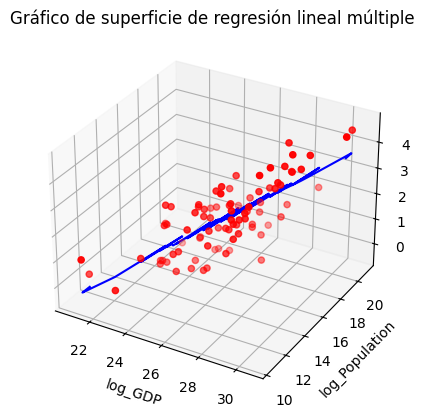

In [38]:

# Datos de ejemplo (reemplaza con tus datos reales)
x = np.array(regression['log_GDP'])
y = np.array(regression['log_Population'])
z = np.array(regression['log_Medals'])


# Crear la malla de puntos x e y
num_puntos = 50
x_range = np.linspace(x.min(), x.max(), num_puntos)
y_range = np.linspace(y.min(), y.max(), num_puntos)
X, Y = np.meshgrid(x_range, y_range)

# Crear el gráfico de superficie 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='red')

# Graficar la línea con las predicciones
ax.plot(x, y, prediccion, color='blue', label='Predicciones')

# Ajustar etiquetas y título
ax.set_xlabel('log_GDP')
ax.set_ylabel('log_Population')
ax.set_zlabel('log_Medals')
ax.set_title('Gráfico de superficie de regresión lineal múltiple')

# Mostrar el gráfico
plt.show()

In [39]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    'Country': regression['Country'],
    'log_GDP': regression['log_GDP'],
    'log_Population': regression['log_Population'],
    'log_Medals': regression['log_Medals']
})
comparar = pd.DataFrame({
    'Country': regression['Country'],
    'log_Medals': regression['log_Medals'],
    'simulacion': prediccion
})
# Gráfico interactivo
fig = px.scatter(df, x=comparar['log_Medals'], y=comparar['simulacion'], text=comparar['Country'],
                 title='log Medallero Real vs Simulado',
                 labels={'x': 'log Medallero Real', 'y': 'log Medallero Simulado'})
# Add a line for identity using Plotly's way
fig.add_shape(
    type='line',
    x0=min(comparar['log_Medals']),
    y0=min(comparar['log_Medals']),
    x1=max(comparar['log_Medals']),
    y1=max(comparar['log_Medals']),)
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()


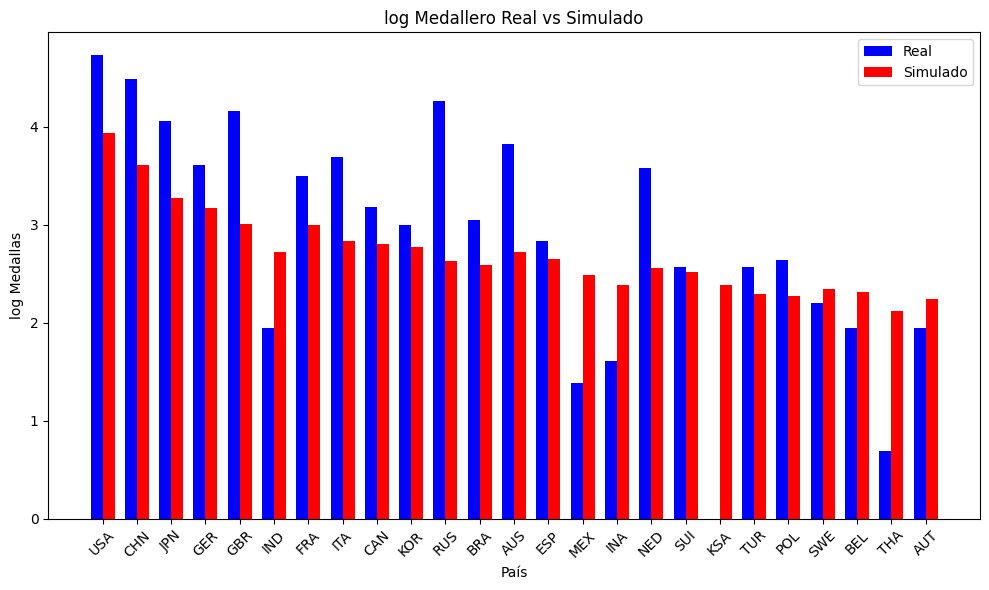

In [40]:

paises = comparar['Country'].head(25)
valores_reales = comparar['log_Medals'].head(25)
valores_simulados = comparar['simulacion'].head(25)

x = np.arange(len(paises))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, valores_reales, width, label='Real', color='blue')
plt.bar(x + width/2, valores_simulados, width, label='Simulado', color='red')
plt.xticks(x, paises, rotation=45)
plt.xlabel("País")
plt.ylabel("log Medallas")
plt.title("log Medallero Real vs Simulado")
plt.legend()
plt.tight_layout()
plt.show()


#supuesto 1, no autocorrelacion

In [41]:
#Se comprueba independencia de errores
from statsmodels.stats.stattools import durbin_watson
durbin_watson_test = durbin_watson(model.resid)
durbin_watson_test
#donde se buscan valores cercanos a 2 para concluir que no hay autocorrelacion

1.8937980974423854

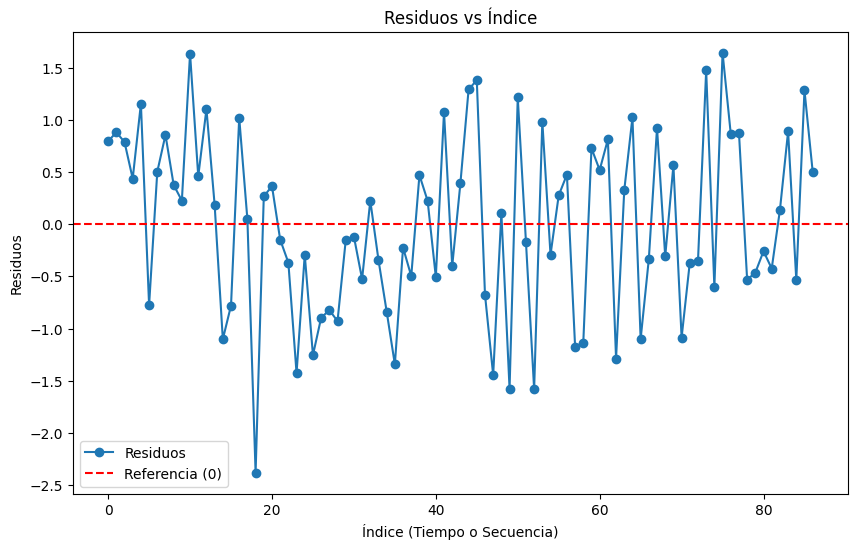

<Figure size 1000x600 with 0 Axes>

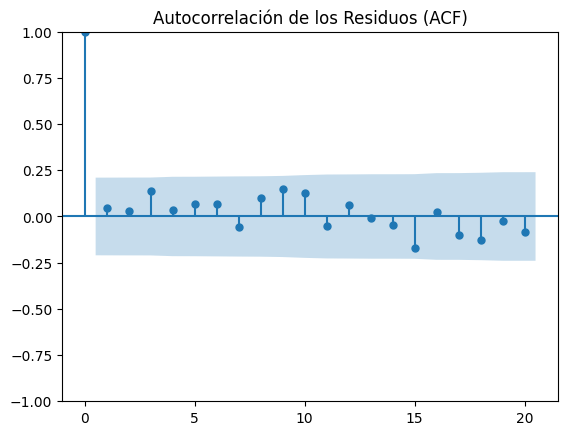

In [42]:

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


# Gráfico 1: Residuos vs Índice (secuencia/tiempo)
plt.figure(figsize=(10, 6))
plt.plot(model.resid, marker='o', linestyle='-', label='Residuos')
plt.axhline(0, color='red', linestyle='--', label='Referencia (0)')
plt.title("Residuos vs Índice")
plt.xlabel("Índice (Tiempo o Secuencia)")
plt.ylabel("Residuos")
plt.legend()
plt.show()

# Gráfico 2: Autocorrelación (ACF)
plt.figure(figsize=(10, 6))
plot_acf(model.resid, lags=20, alpha=0.05)
plt.title("Autocorrelación de los Residuos (ACF)")
plt.show()


Gráfico de Residuos vs Índice:

Busca patrones en los residuos.
Si ves una estructura cíclica o tendencia, hay autocorrelación.

ACF:

Si las barras de autocorrelación para lags significativos (1, 2, etc.) están fuera de los intervalos de confianza, hay autocorrelación.

#Supuesto 2, normalidad de errores

Prueba de Shapiro-Wilk: Estadístico=0.9820987616975456, p-valor=0.2724246995248987
Prueba de Kolmogorov-Smirnov: Estadístico=0.07163632133792242, p-valor=0.7359289345137328


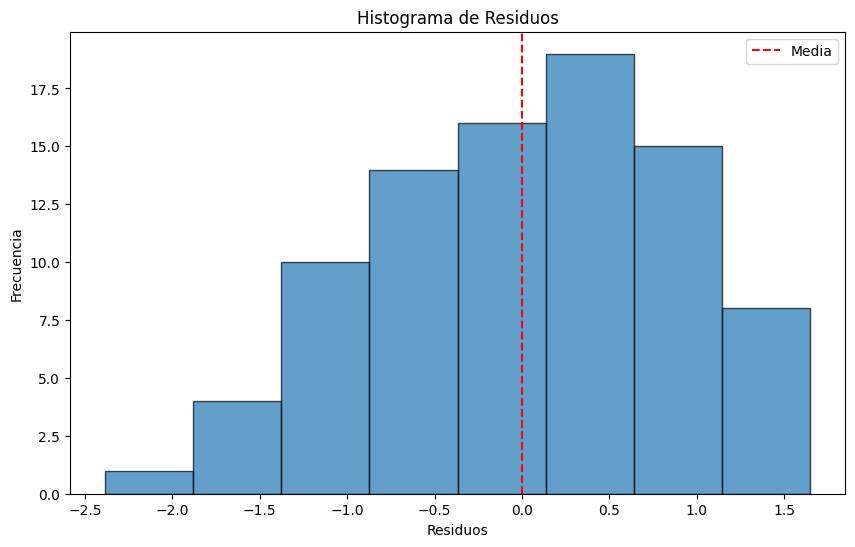

<Figure size 1000x600 with 0 Axes>

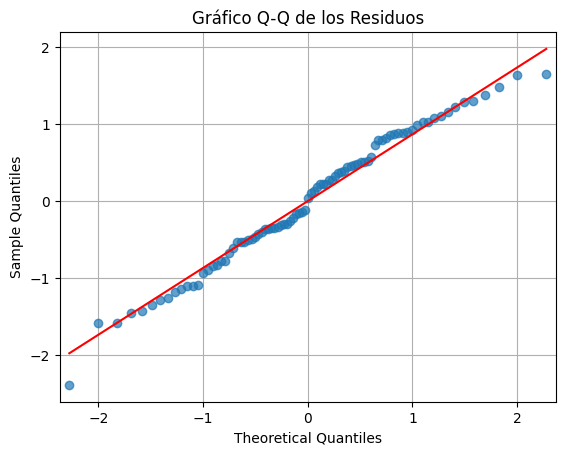

In [43]:
#prueba shapiro y kolmogorov para residuos
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Prueba de Shapiro-Wilk
shapiro_stat, shapiro_p = stats.shapiro(model.resid)
print(f"Prueba de Shapiro-Wilk: Estadístico={shapiro_stat}, p-valor={shapiro_p}")

# Prueba de Kolmogorov-Smirnov (con media y varianza normalizadas)
ks_stat, ks_p = stats.kstest(model.resid, 'norm', args=(np.mean(model.resid), np.std(model.resid)))
print(f"Prueba de Kolmogorov-Smirnov: Estadístico={ks_stat}, p-valor={ks_p}")

# Visualizaciones:
# 1. Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(model.resid, bins=8, edgecolor='black', alpha=0.7)
plt.title("Histograma de Residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.axvline(0, color='red', linestyle='--', label="Media")
plt.legend()
plt.show()

# 2. Gráfico Q-Q (Quantile-Quantile)
plt.figure(figsize=(10, 6))
qqplot(model.resid, line='s', alpha=0.7)
plt.title("Gráfico Q-Q de los Residuos")
plt.grid()
plt.show()


Shapiro-Wilk y Kolmogorov-Smirnov:
Si p > 0.05 No se rechaza H_0. Los residuos son aproximadamente normales

Grafico Q-Q
Los puntos deberían alinearse aproximadamente con la línea diagonal.
Desviaciones notables (especialmente en los extremos) sugieren problemas de normalidad.

#Supuesto 3, Homocedasticidad

Prueba de Breusch-Pagan: Estadístico=0.04288139835361904, p-valor=0.9787875186537703
Prueba de White (LM): Estadístico=2.6403579964014288, p-valor=0.7552241995788884
Prueba de White (F): Estadístico=0.5070410272708193, p-valor=0.7701384172459993


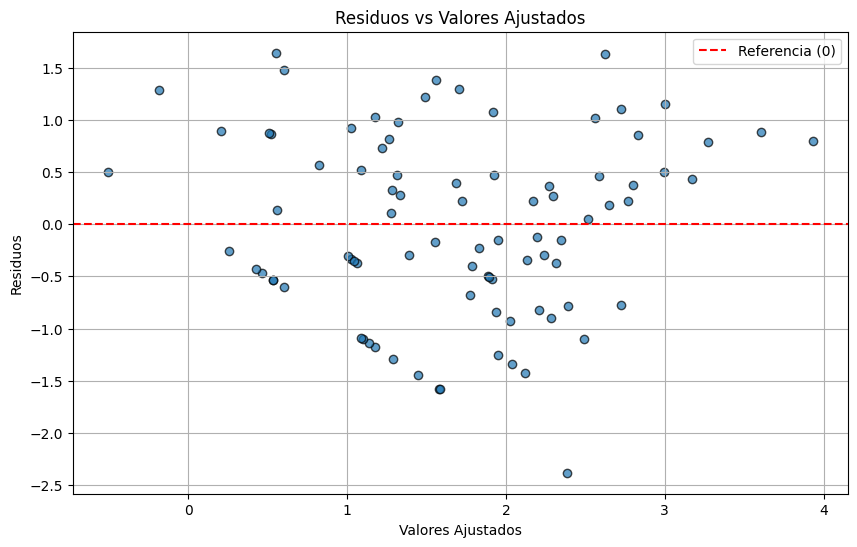

In [44]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
import matplotlib.pyplot as plt


# Residuos y valores ajustados
residuos = model.resid
valores_ajustados = model.fittedvalues
X = sm.add_constant(regression[['log_GDP', 'log_Population']])
# Prueba de Breusch-Pagan
bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuos, X)
print(f"Prueba de Breusch-Pagan: Estadístico={bp_stat}, p-valor={bp_pvalue}")

# Prueba de White
white_stat, white_pvalue, fvalue, f_pvalue = het_white(residuos, X)  # Unpack all 4 values
print(f"Prueba de White (LM): Estadístico={white_stat}, p-valor={white_pvalue}")
print(f"Prueba de White (F): Estadístico={fvalue}, p-valor={f_pvalue}")

# Gráfico 1: Residuos vs Valores Ajustados
plt.figure(figsize=(10, 6))
plt.scatter(valores_ajustados, residuos, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', label="Referencia (0)")
plt.title("Residuos vs Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.legend()
plt.grid(True)
plt.show()


Breusch-Pagan: Si 𝑝 > 0.05, no hay evidencia de heterocedasticidad
White: lo mismo pero mas complejo

Residuos vs Valores Ajustados:
Si los puntos están distribuidos de manera aleatoria, no hay heterocedasticidad.

#Supuesto 4, Multicolinealidad

         Variable         VIF
0           const  193.631048
1         log_GDP    2.658731
2  log_Population    2.658731


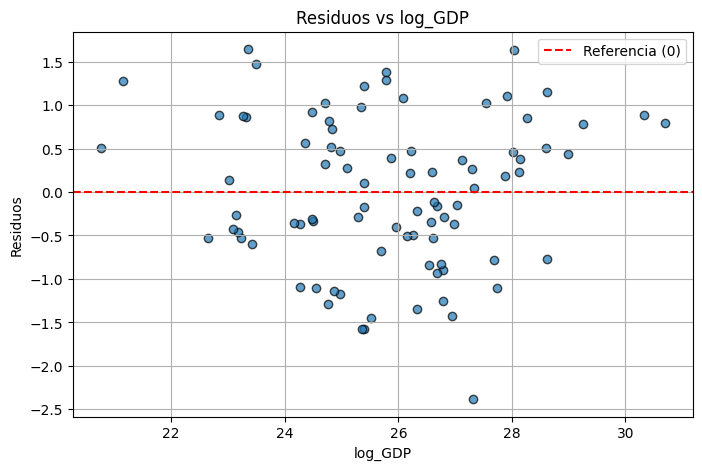

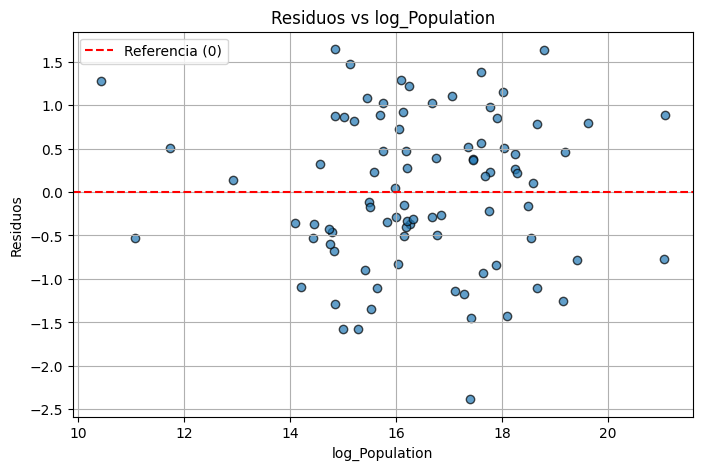

In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

X = sm.add_constant(regression[['log_GDP', 'log_Population']])
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif_data)


for col in X.columns[1:]:
    plt.figure(figsize=(8, 5))
    plt.scatter(X[col], residuos, alpha=0.7, edgecolor='k')
    plt.axhline(0, color='red', linestyle='--', label='Referencia (0)')
    plt.title(f"Residuos vs {col}")
    plt.xlabel(col)
    plt.ylabel("Residuos")
    plt.legend()
    plt.grid(True)
    plt.show()


El VIF mide cuánto se incrementa la varianza de un coeficiente debido a la multicolinealidad
Interpretación:

VIF=1: No hay correlación con otras variables.

1< VIF ≤5: Multicolinealidad moderada, usualmente aceptable.

VIF>5: Multicolinealidad significativa.

VIF>10: Multicolinealidad severa, requiere atención.

Residuos vs Variables Independientes:
Visualiza si los residuos tienen un patrón asociado a alguna variable.


#HASTA AQUI RESULTADOS DEL ARTICULO A REPLICAR, AHORA SE BUSCA AMPLIAR CON UN ANALISIS DE MUCHAS MAS VARIABLES DE INTERES ASI COMO MODELOS PARA AJUSTAR UNA REGRESION OPTIMA, DENTRO DE 4 DIF VARIABLES DEPENDIENTES EN BUSCA DE LAS MEJORES METRICAS DE RENDIMIENTO

#DF de todas las variables de interes

In [46]:
MS_adjust = MS.drop(columns=['Núm.','oro','plata','bronce'])

In [47]:
NU = NU.drop(columns=['Country Code','Country Name'])
NU.head()

,Population,Country,log_Population
0,106585.0,ARU,11.576698
1,685112979.0,NaN,20.345094
2,38972230.0,AFG,17.478360
3,466189102.0,NaN,19.960102
4,33428486.0,ANG,17.324919


#SE genera un unico df para empezar a modelar las variables con mejor rendimiento

In [48]:
df_general = pd.merge(GDP_adjust, MS_adjust, on='Country')
df_general = pd.merge(df_general, NU, on='Country')
df_general = pd.merge(df_general, ATL_adjust, on='Country', how = 'left')
df_general = pd.merge(df_general, OLP_adjust, on='Country', how = 'left')
df_general = pd.merge(df_general, URP_adjust, on='Country', how = 'left')
df_general = pd.merge(df_general, MEX_adjust, on='Country', how = 'left')
df_general = pd.merge(df_general, EEX_adjust, on='Country', how = 'left')
df_general = pd.merge(df_general, HEX_adjust, on='Country', how = 'left')
df_general = pd.merge(df_general, LEP_adjust, on='Country', how = 'left')
df_general = pd.merge(df_general, CAS_adjust, on='Country', how = 'left')
#df_general = pd.merge(df_general, DOC_adjust, on='Country', how = 'left')
df_general = pd.merge(df_general, COR_adjust, on='Country', how = 'left')

In [49]:
purosdatos = df_general.drop(columns=['Country Name','Country'])

#se revisa la correlacion de las variables con objetivo de modificar, juntar o empezar a ver las variables de valor

In [50]:
purosdatos.corr()

,GDP,log_GDP,Total,MED,log_Med,log_Medals,Population,log_Population,Athlete,log_Athlete,Pop over 65,Urban Pop,Military %,Education %,Health %,Life E,calorias per capita per dia,Corruption
GDP,1.000000,0.558054,0.832353,0.854958,0.491375,0.523497,0.559137,0.437525,0.666284,0.435985,0.143225,0.097691,0.057158,-0.016695,0.387354,0.152536,0.228178,0.140975
log_GDP,0.558054,1.000000,0.649627,0.631627,0.671221,0.700637,0.435499,0.789861,0.768145,0.832177,0.279802,0.260730,-0.061305,0.080092,0.359811,0.372240,0.474819,0.267220
Total,0.832353,0.649627,1.000000,0.992446,0.757567,0.805837,0.409244,0.465180,0.872597,0.653511,0.320156,0.198831,0.027190,-0.004503,0.492692,0.272900,0.306086,0.238582
MED,0.854958,0.631627,0.992446,1.000000,0.744804,0.774087,0.438553,0.451078,0.848455,0.623301,0.310901,0.191070,0.021830,-0.015641,0.479766,0.270591,0.274232,0.237258
log_Med,0.491375,0.671221,0.757567,0.744804,1.000000,0.949480,0.259459,0.440840,0.782391,0.804233,0.478729,0.214416,-0.126195,0.003799,0.526902,0.438292,0.392281,0.335886
log_Medals,0.523497,0.700637,0.805837,0.774087,0.949480,1.000000,0.288695,0.501151,0.834597,0.838775,0.443864,0.194287,-0.159717,0.044553,0.518682,0.385602,0.398601,0.308336
Population,0.559137,0.435499,0.409244,0.438553,0.259459,0.288695,1.000000,0.546356,0.293750,0.258591,-0.104420,-0.192688,-0.003442,-0.133428,-0.153158,-0.087130,-0.088623,-0.121648
log_Population,0.437525,0.789861,0.465180,0.451078,0.440840,0.501151,0.546356,1.000000,0.528177,0.640481,-0.161438,-0.193758,-0.069020,-0.023262,-0.040787,-0.172162,0.022508,-0.281783
Athlete,0.666284,0.768145,0.872597,0.848455,0.782391,0.834597,0.293750,0.528177,1.000000,0.837066,0.418669,0.286106,-0.100853,0.089534,0.578631,0.385895,0.391910,0.343271
log_Athlete,0.435985,0.832177,0.653511,0.623301,0.804233,0.838775,0.258591,0.640481,0.837066,1.000000,0.418207,0.206805,-0.215371,0.206338,0.487912,0.369872,0.519755,0.280751


<Axes: >

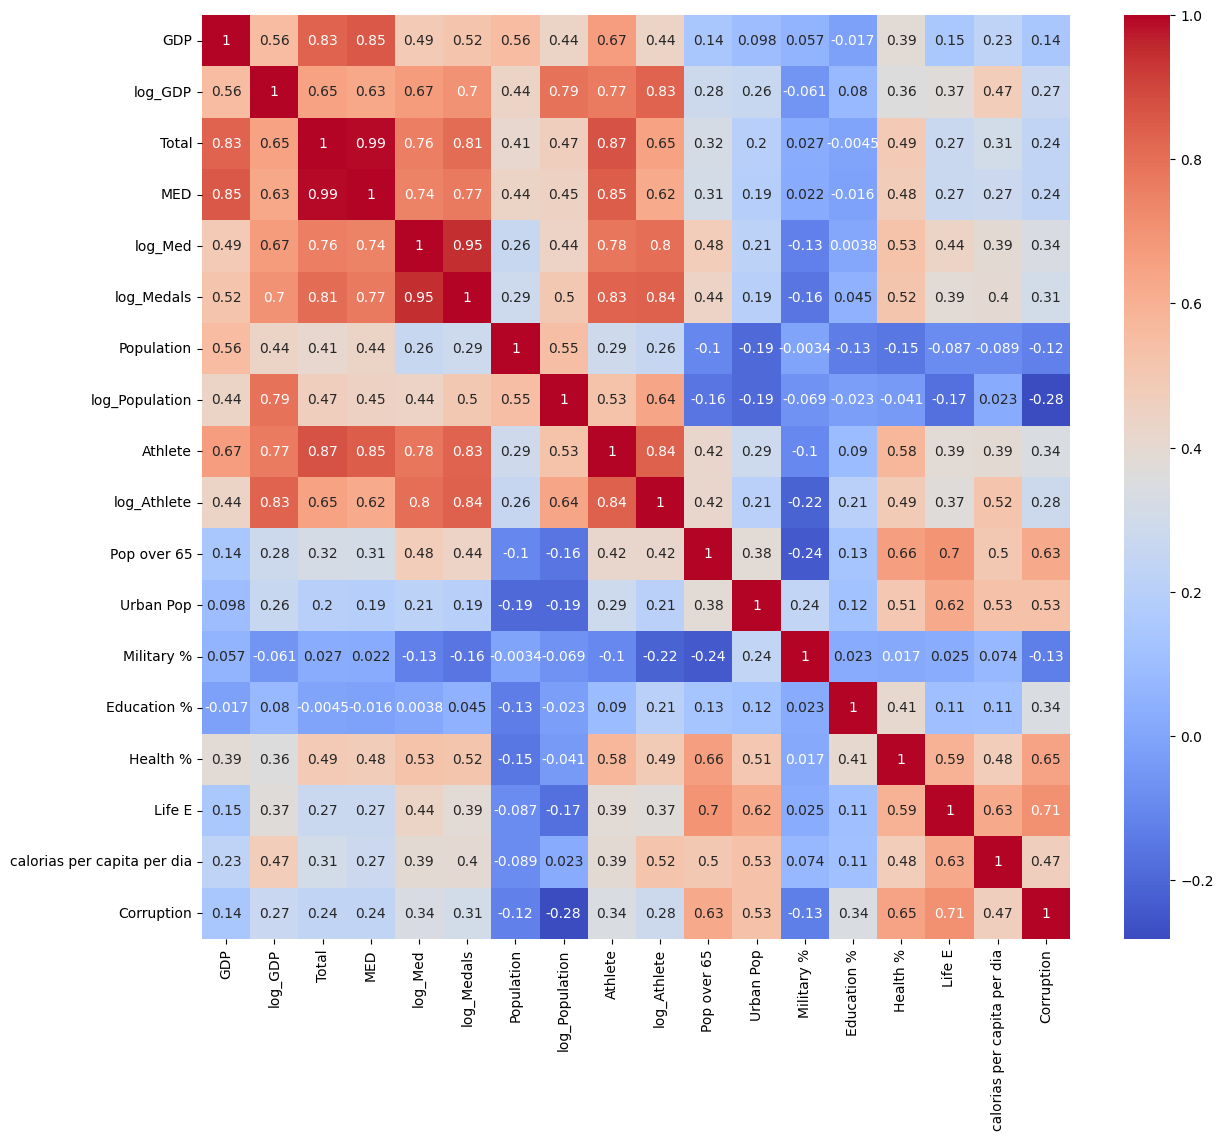

In [51]:
#realizamos un heatmap de la correlacion
plt.figure(figsize=(14, 12))
sns.heatmap(purosdatos.corr(), annot=True, cmap='coolwarm')

In [52]:
#tabla de correlacion enfocadas a las variables y dependientes 'MED','log_Med','Total' y 'log_Medals'
purosdatos.corr()[['MED','log_Med','Total','log_Medals']]

,MED,log_Med,Total,log_Medals
GDP,0.854958,0.491375,0.832353,0.523497
log_GDP,0.631627,0.671221,0.649627,0.700637
Total,0.992446,0.757567,1.000000,0.805837
MED,1.000000,0.744804,0.992446,0.774087
log_Med,0.744804,1.000000,0.757567,0.949480
log_Medals,0.774087,0.949480,0.805837,1.000000
Population,0.438553,0.259459,0.409244,0.288695
log_Population,0.451078,0.440840,0.465180,0.501151
Athlete,0.848455,0.782391,0.872597,0.834597
log_Athlete,0.623301,0.804233,0.653511,0.838775


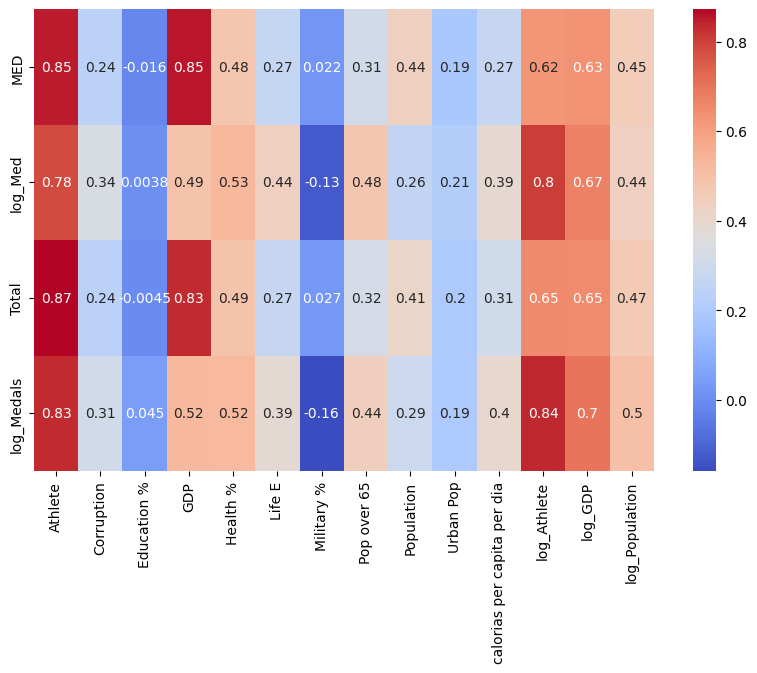

In [53]:
# Variables a mostrar en el eje horizontal
variables_horizontales = ['MED','log_Med','Total','log_Medals']

# Crear un nuevo DataFrame con las variables horizontales
df_horizontal = purosdatos[variables_horizontales]

# Calcular la matriz de correlación
corr_matrix = purosdatos.corr()

# Seleccionar las filas y columnas relevantes
corr_matrix_filtered = corr_matrix.loc[variables_horizontales, purosdatos.columns.difference(variables_horizontales)]

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm')
plt.show()

In [54]:
#contamos primero los na por columna
purosdatos.isna().sum()

,0
GDP,0
log_GDP,0
Total,0
MED,0
log_Med,0
log_Medals,0
Population,0
log_Population,0
Athlete,0
log_Athlete,0


In [55]:
#rellenamos NaN con sus medias ya que son pocos los datos faltantes
purosdatos = purosdatos.fillna(purosdatos.mean())

In [56]:
'''
from google.colab import files
purosdatos.to_csv('variablestokio2020.csv', index=False)
files.download('variablestokio2020.csv')
'''

"\nfrom google.colab import files\npurosdatos.to_csv('variablestokio2020.csv', index=False)\nfiles.download('variablestokio2020.csv')\n"

#Una vez con nuestro data frame de 4 opciones de Y variable dependiente a predecir 'log_Medals','Total','MED','log_MED, que son el medallero representado de diferentes formas, variables base X que son 'log_gdp y log_population' o en todo caso gdp y population, procederemos a revisar variables de interes de 3 en 3, teniendo regresiones lineales de 5 variables

#modificamos las columnas para no tener errores en los modelos por espacios

In [57]:
purosdatos = purosdatos.rename(columns={'Education %': 'Education_proportion','Health %': 'Health_proportion','Military %':'Military_proportion',
                                        'calorias per capita per dia':'calorias_per_capita_per_dia','Physicians (per 1,000 people)':'Physicians_per_1000_people',
                                        'Pop over 65':'Pop_over_65'})

#Regresiones lineales con Y=MED (A weighted sum of the number of medals won by a country) X= (GDP,Population) , Q variables de interes combinaciones de 3 de las restantes

In [58]:
import pandas as pd
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataframe
df = purosdatos

# Define the columns
base_X = ['GDP','Population']
y = 'MED'
variables_interes = df.columns[df.columns.get_loc('Athlete'):].tolist()

# Function to perform the regressions
def regresiones_combinadas(df, base_X, y, variables_interes):
    resultados = pd.DataFrame(columns=['MSE', 'MAE', 'R2', 'Columnas'])

    for combinacion in combinations(variables_interes, 3):
        X = df[base_X + list(combinacion)]
        modelo = LinearRegression()
        modelo.fit(X, df[y])
        y_pred = modelo.predict(X)

        mse = mean_squared_error(df[y], y_pred)
        mae = mean_absolute_error(df[y], y_pred)
        r2 = r2_score(df[y], y_pred)

        # Concatenate the results into the DataFrame
        resultados = pd.concat([resultados, pd.DataFrame({
            'MSE': [mse],
            'MAE': [mae],
            'R2': [r2],
            'Columnas': [combinacion]
        })], ignore_index=True)

    return resultados.sort_values(by='R2', ascending=False)

# Call the function and display the results
resultados = regresiones_combinadas(df, base_X, y, variables_interes)
resultados

<ipython-input-58-bdae0b88bdb2>:29: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,MSE,MAE,R2,Columnas
13,5.771484,1.408865,0.875236,"(Athlete, Pop_over_65, calorias_per_capita_per..."
28,5.773031,1.425942,0.875202,"(Athlete, Education_proportion, calorias_per_c..."
21,5.774008,1.527571,0.875181,"(Athlete, Military_proportion, Education_propo..."
24,5.784973,1.456707,0.874944,"(Athlete, Military_proportion, calorias_per_ca..."
3,5.799549,1.461971,0.874629,"(Athlete, log_Athlete, Education_proportion)"
...,...,...,...,...
109,11.735274,2.123743,0.746314,"(Military_proportion, calorias_per_capita_per_..."
88,11.746858,2.141582,0.746063,"(Urban Pop, Military_proportion, calorias_per_..."
85,11.765124,2.158560,0.745669,"(Urban Pop, Military_proportion, Education_pro..."
92,11.845106,2.166401,0.743940,"(Urban Pop, Education_proportion, calorias_per..."


#Tomamos los mejores 3 modelos para analizarlos mas a fondo, tablas comparativas de medallas y posteriormente analizarlos con train-test

In [59]:
resultados.head(3)

,MSE,MAE,R2,Columnas
13,5.771484,1.408865,0.875236,"(Athlete, Pop_over_65, calorias_per_capita_per..."
28,5.773031,1.425942,0.875202,"(Athlete, Education_proportion, calorias_per_c..."
21,5.774008,1.527571,0.875181,"(Athlete, Military_proportion, Education_propo..."


In [60]:
#regresion de variables base X y columnas con mejor R2

# Ajustar el modelo de regresión lineal multivariada
model_top1_1 = smf.ols('MED ~ GDP + Population + Athlete + Pop_over_65 + calorias_per_capita_per_dia', data=purosdatos).fit()

# Imprimir el resumen del modelo
print(model_top1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    MED   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     113.6
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           4.12e-35
Time:                        00:59:52   Log-Likelihood:                -199.70
No. Observations:                  87   AIC:                             411.4
Df Residuals:                      81   BIC:                             426.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [61]:
y_pred = model_top1_1.predict(purosdatos)
mse_1 = mean_squared_error(purosdatos['MED'], y_pred)
mae_1 = mean_absolute_error(purosdatos['MED'], y_pred)
r2_1 = r2_score(purosdatos['MED'], y_pred)
aic_1 = model_top1_1.aic
bic_1 = model_top1_1.bic
print(f'MSE Modelo top1_1: {mse_1}')
print(f'MAE Modelo top1_1: {mae_1}')
print(f'R2 Modelo top1_1: {r2_1}')
print(f'AIC Modelo top1_1: {aic_1}')
print(f'BIC Modelo top1_1: {bic_1}')

MSE Modelo top1_1: 5.771483956731627
MAE Modelo top1_1: 1.4088650601936266
R2 Modelo top1_1: 0.8752355249289496
AIC Modelo top1_1: 411.40014799024874
BIC Modelo top1_1: 426.19559670217626


In [62]:
#solo columna 'MED' y 'Country' de df_general
df_general_medallas = df_general[['Country','MED']]

#creamos una tabla comparativa de los resultados de variables ancla GDP y NU, variables de interes ATL, OLP y CAS, variable dependiente MED

In [63]:
medallas_sim = y_pred.round(1)

comparar = pd.concat([df_general_medallas, medallas_sim,abs(df_general_medallas['MED']-medallas_sim)], axis=1)
#poner titulos a comparar '0' por 'simulacion', '1' por 'diferencia'
comparar.rename(columns={0: 'simulacion', 1: 'diferencia'}, inplace=True)
comparar

,Country,MED,simulacion,diferencia
0,USA,39.0,42.1,3.1
1,CHN,34.3,28.5,5.8
2,JPN,22.1,21.7,0.4
3,GER,10.9,15.4,4.5
4,GBR,21.4,12.8,8.6
...,...,...,...,...
82,BAH,1.2,0.6,0.6
83,KGZ,0.7,0.2,0.5
84,BER,0.6,0.2,0.4
85,SMR,0.5,0.3,0.2


#vemos graficamente los reales vs simulados

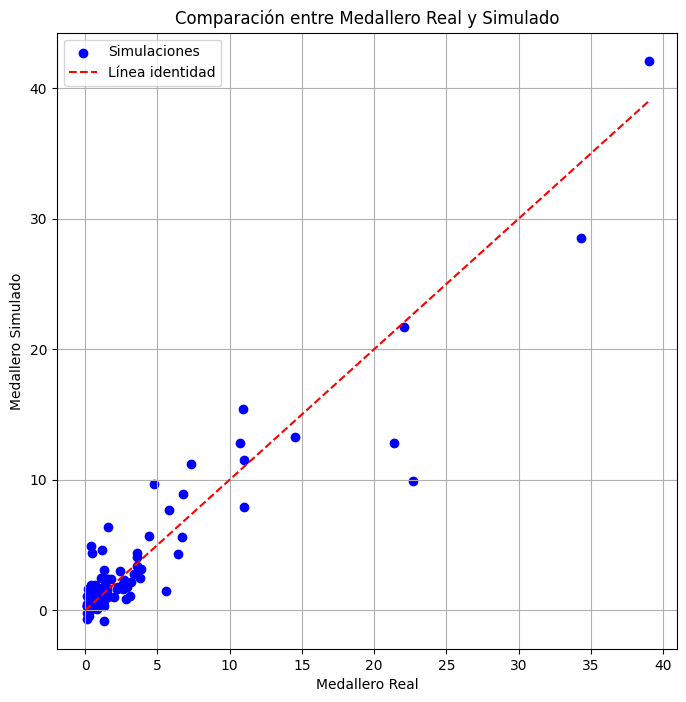

In [64]:

plt.figure(figsize=(8, 8))
plt.scatter(comparar['MED'], comparar['simulacion'], color='blue', label='Simulaciones')
plt.plot([0, max(comparar['MED'])], [0, max(comparar['MED'])], color='red', linestyle='--', label='Línea identidad')
plt.xlabel("Medallero Real")
plt.ylabel("Medallero Simulado")
plt.title("Comparación entre Medallero Real y Simulado")
plt.legend()
plt.grid()
plt.show()


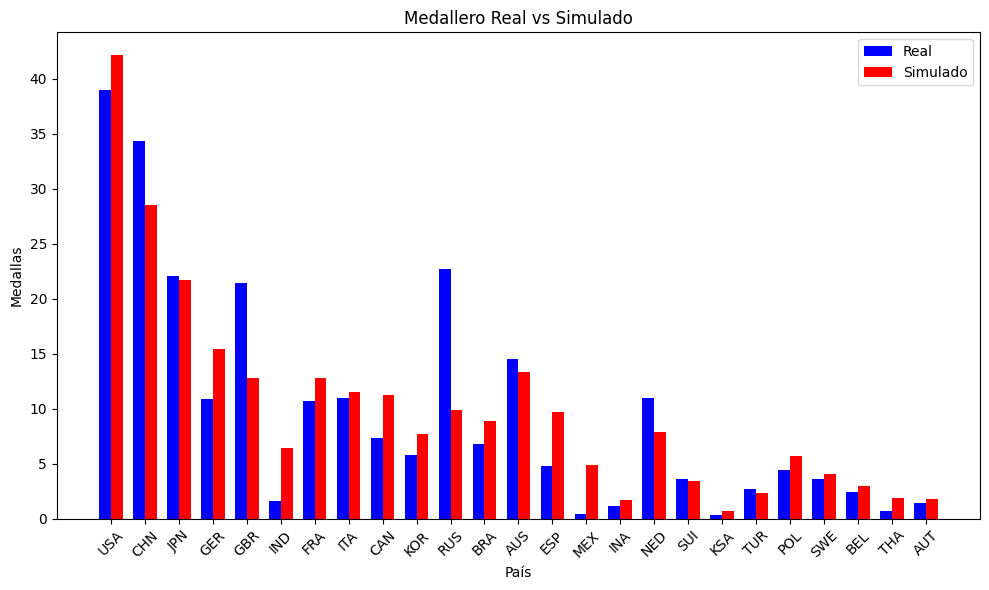

In [65]:

paises = comparar['Country'].head(25)
valores_reales = comparar['MED'].head(25)
valores_simulados = comparar['simulacion'].head(25)

x = np.arange(len(paises))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, valores_reales, width, label='Real', color='blue')
plt.bar(x + width/2, valores_simulados, width, label='Simulado', color='red')
plt.xticks(x, paises, rotation=45)
plt.xlabel("País")
plt.ylabel("Medallas")
plt.title("Medallero Real vs Simulado")
plt.legend()
plt.tight_layout()
plt.show()


In [66]:
import plotly.express as px
import pandas as pd


# Gráfico interactivo
fig = px.scatter(df, x=comparar['MED'], y=comparar['simulacion'], text=comparar['Country'],
                 title='Medallero Real vs Simulado',
                 labels={'x': 'Medallero Real', 'y': 'Medallero Simulado'})
# Add a line for identity using Plotly's way
fig.add_shape(
    type='line',
    x0=min(comparar['MED']),
    y0=min(comparar['MED']),
    x1=max(comparar['MED']),
    y1=max(comparar['MED']),)
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()


#ahora utilizando variables ancla log(NU) y log(GDP), con y sigue siendo MED

In [67]:
# Load the dataframe
df = purosdatos

# Define the columns
base_X = ['log_GDP','log_Population']
y = 'MED'
variables_interes = df.columns[df.columns.get_loc('Athlete'):].tolist()

# Function to perform the regressions
def regresiones_combinadas(df, base_X, y, variables_interes):
    resultados = pd.DataFrame(columns=['MSE', 'MAE', 'R2', 'Columnas'])

    for combinacion in combinations(variables_interes, 3):
        X = df[base_X + list(combinacion)]
        modelo = LinearRegression()
        modelo.fit(X, df[y])
        y_pred = modelo.predict(X)

        mse = mean_squared_error(df[y], y_pred)
        mae = mean_absolute_error(df[y], y_pred)
        r2 = r2_score(df[y], y_pred)

        # Concatenate the results into the DataFrame
        resultados = pd.concat([resultados, pd.DataFrame({
            'MSE': [mse],
            'MAE': [mae],
            'R2': [r2],
            'Columnas': [combinacion]
        })], ignore_index=True)

    return resultados.sort_values(by='R2', ascending=False)

# Call the function and display the results
resultados = regresiones_combinadas(df, base_X, y, variables_interes)
resultados

<ipython-input-67-143a85648729>:24: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,MSE,MAE,R2,Columnas
2,11.261139,2.088137,0.756563,"(Athlete, log_Athlete, Military_proportion)"
1,11.356337,2.098658,0.754506,"(Athlete, log_Athlete, Urban Pop)"
3,11.398847,2.062232,0.753587,"(Athlete, log_Athlete, Education_proportion)"
7,11.428132,2.080443,0.752954,"(Athlete, log_Athlete, Corruption)"
5,11.456738,2.077574,0.752335,"(Athlete, log_Athlete, Life E)"
...,...,...,...,...
87,27.246024,3.596021,0.411012,"(Urban Pop, Military_proportion, Life E)"
89,27.247142,3.576868,0.410988,"(Urban Pop, Military_proportion, Corruption)"
119,27.250628,3.592507,0.410912,"(Life E, calorias_per_capita_per_dia, Corruption)"
108,27.330978,3.600527,0.409175,"(Military_proportion, Life E, Corruption)"


#Aplicamos las mismas tablas comparativas del mejor modelo asi como graficas

observamos peores resultados en las metricas con estas variables base nuevas pero aun asi tomaremos el mejor modelo en metricas para despues compararlo con los otros mejores en una prueba cruzada de train test

In [68]:
#regresion de variables base X y columnas con mejor R2

# Ajustar el modelo de regresión lineal multivariada
model_top1_2 = smf.ols('MED ~ log_GDP + log_Population + Athlete + log_Athlete + Military_proportion', data=purosdatos).fit()

# Imprimir el resumen del modelo
print(model_top1_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    MED   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     50.35
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           1.90e-23
Time:                        00:59:56   Log-Likelihood:                -228.78
No. Observations:                  87   AIC:                             469.6
Df Residuals:                      81   BIC:                             484.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.5991    

In [69]:
y_pred = model_top1_2.predict(purosdatos)
mse_2 = mean_squared_error(purosdatos['MED'], y_pred)
mae_2 = mean_absolute_error(purosdatos['MED'], y_pred)
r2_2 = r2_score(purosdatos['MED'], y_pred)
aic_2 = model_top1_2.aic
bic_2 = model_top1_2.bic
print(f'MSE Modelo top1_2: {mse_2}')
print(f'MAE Modelo top1_2: {mae_2}')
print(f'R2 Modelo top1_2: {r2_2}')
print(f'AIC Modelo top1_2: {aic_2}')
print(f'BIC Modelo top1_2: {bic_2}')

MSE Modelo top1_2: 11.261139103849603
MAE Modelo top1_2: 2.088137280385831
R2 Modelo top1_2: 0.7565634558586705
AIC Modelo top1_2: 469.55343175480397
BIC Modelo top1_2: 484.3488804667315


In [70]:
medallas_sim = y_pred.round(1)

comparar = pd.concat([df_general_medallas, medallas_sim,abs(df_general_medallas['MED']-medallas_sim)], axis=1)
#poner titulos a comparar '0' por 'simulacion', '1' por 'diferencia'
comparar.rename(columns={0: 'simulacion', 1: 'diferencia'}, inplace=True)
comparar

,Country,MED,simulacion,diferencia
0,USA,39.0,28.5,10.5
1,CHN,34.3,17.7,16.6
2,JPN,22.1,24.0,1.9
3,GER,10.9,17.5,6.6
4,GBR,21.4,15.3,6.1
...,...,...,...,...
82,BAH,1.2,-0.4,1.6
83,KGZ,0.7,0.3,0.4
84,BER,0.6,2.3,1.7
85,SMR,0.5,0.3,0.2


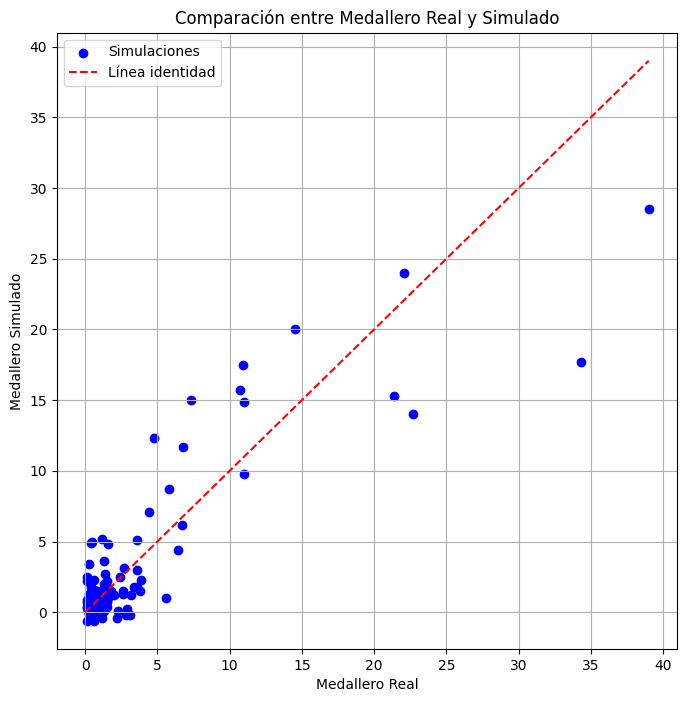

In [71]:
plt.figure(figsize=(8, 8))
plt.scatter(comparar['MED'], comparar['simulacion'], color='blue', label='Simulaciones')
plt.plot([0, max(comparar['MED'])], [0, max(comparar['MED'])], color='red', linestyle='--', label='Línea identidad')
plt.xlabel("Medallero Real")
plt.ylabel("Medallero Simulado")
plt.title("Comparación entre Medallero Real y Simulado")
plt.legend()
plt.grid()
plt.show()

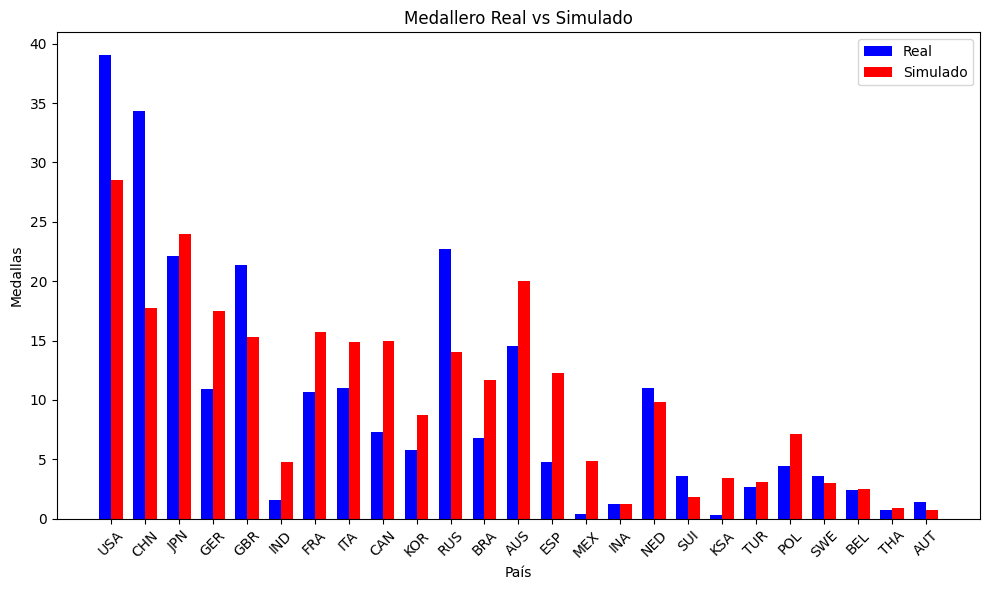

In [72]:
paises = comparar['Country'].head(25)
valores_reales = comparar['MED'].head(25)
valores_simulados = comparar['simulacion'].head(25)

x = np.arange(len(paises))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, valores_reales, width, label='Real', color='blue')
plt.bar(x + width/2, valores_simulados, width, label='Simulado', color='red')
plt.xticks(x, paises, rotation=45)
plt.xlabel("País")
plt.ylabel("Medallas")
plt.title("Medallero Real vs Simulado")
plt.legend()
plt.tight_layout()
plt.show()


In [73]:
import plotly.express as px
import pandas as pd


# Gráfico interactivo
fig = px.scatter(df, x=comparar['MED'], y=comparar['simulacion'], text=comparar['Country'],
                 title='Medallero Real vs Simulado',
                 labels={'x': 'Medallero Real', 'y': 'Medallero Simulado'})
# Add a line for identity using Plotly's way
fig.add_shape(
    type='line',
    x0=min(comparar['MED']),
    y0=min(comparar['MED']),
    x1=max(comparar['MED']),
    y1=max(comparar['MED']),)
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

#Ahora la variable a predecir sera y = log_MED con variables base log_GDP y log_NU

In [74]:
# Load the dataframe
df = purosdatos

# Define the columns
base_X = ['log_GDP','log_Population']
y = 'log_Med'
variables_interes = df.columns[df.columns.get_loc('Athlete'):].tolist()

# Function to perform the regressions
def regresiones_combinadas(df, base_X, y, variables_interes):
    resultados = pd.DataFrame(columns=['MSE', 'MAE', 'R2', 'Columnas'])

    for combinacion in combinations(variables_interes, 3):
        X = df[base_X + list(combinacion)]
        modelo = LinearRegression()
        modelo.fit(X, df[y])
        y_pred = modelo.predict(X)

        mse = mean_squared_error(df[y], y_pred)
        mae = mean_absolute_error(df[y], y_pred)
        r2 = r2_score(df[y], y_pred)

        # Concatenate the results into the DataFrame
        resultados = pd.concat([resultados, pd.DataFrame({
            'MSE': [mse],
            'MAE': [mae],
            'R2': [r2],
            'Columnas': [combinacion]
        })], ignore_index=True)

    return resultados.sort_values(by='R2', ascending=False)

# Call the function and display the results
resultados = regresiones_combinadas(df, base_X, y, variables_interes)
resultados

<ipython-input-74-5b797cbdf9dc>:24: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,MSE,MAE,R2,Columnas
54,0.549073,0.574161,0.722880,"(log_Athlete, Education_proportion, Health_pro..."
3,0.561912,0.601839,0.716400,"(Athlete, log_Athlete, Education_proportion)"
5,0.581332,0.609466,0.706598,"(Athlete, log_Athlete, Life E)"
0,0.586191,0.609410,0.704146,"(Athlete, log_Athlete, Pop_over_65)"
56,0.594210,0.607319,0.700099,"(log_Athlete, Education_proportion, calorias_p..."
...,...,...,...,...
102,1.023067,0.816410,0.483653,"(Military_proportion, Education_proportion, ca..."
109,1.023439,0.810442,0.483465,"(Military_proportion, calorias_per_capita_per_..."
99,1.024592,0.817416,0.482883,"(Urban Pop, calorias_per_capita_per_dia, Corru..."
88,1.025164,0.818234,0.482594,"(Urban Pop, Military_proportion, calorias_per_..."


#Haremos las mismas tablas comparativas y graficas con el modelo con mejores parametros

In [75]:
#regresion de variables base X y columnas con mejor R2

# Ajustar el modelo de regresión lineal multivariada
model_top1_3 = smf.ols('log_Med ~ log_GDP + log_Population + log_Athlete + Education_proportion + Health_proportion', data=purosdatos).fit()

# Imprimir el resumen del modelo
print(model_top1_3.summary())

                            OLS Regression Results                            
Dep. Variable:                log_Med   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     42.26
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           3.39e-21
Time:                        01:00:01   Log-Likelihood:                -97.368
No. Observations:                  87   AIC:                             206.7
Df Residuals:                      81   BIC:                             221.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5218 

In [76]:
y_pred = model_top1_3.predict(purosdatos)
mse_3 = mean_squared_error(purosdatos['log_Med'], y_pred)
mae_3 = mean_absolute_error(purosdatos['log_Med'], y_pred)
r2_3 = r2_score(purosdatos['log_Med'], y_pred)
aic_3 = model_top1_3.aic
bic_3 = model_top1_3.bic
print(f'MSE Modelo top1_3: {mse_3}')
print(f'MAE Modelo top1_3: {mae_3}')
print(f'R2 Modelo top1_3: {r2_3}')
print(f'AIC Modelo top1_3: {aic_3}')
print(f'BIC Modelo top1_3: {bic_3}')

MSE Modelo top1_3: 0.5490729227129411
MAE Modelo top1_3: 0.5741606442996481
R2 Modelo top1_3: 0.7228798949174717
AIC Modelo top1_3: 206.7367152084136
BIC Modelo top1_3: 221.5321639203411


In [77]:
#solo columna 'log_Med' y 'Country' de df_general
df_general_medallas = df_general[['Country','log_Med']]

In [78]:
medallas_sim = y_pred.round(1)

comparar = pd.concat([df_general_medallas, medallas_sim,abs(df_general_medallas['log_Med']-medallas_sim)], axis=1)
#poner titulos a comparar '0' por 'simulacion', '1' por 'diferencia'
comparar.rename(columns={0: 'simulacion', 1: 'diferencia'}, inplace=True)
comparar

,Country,log_Med,simulacion,diferencia
0,USA,3.663562,3.6,0.063562
1,CHN,3.535145,2.0,1.535145
2,JPN,3.095578,3.1,0.004422
3,GER,2.388763,2.5,0.111237
4,GBR,3.063391,2.3,0.763391
...,...,...,...,...
82,BAH,0.182322,-0.2,0.382322
83,KGZ,-0.356675,-1.4,1.043325
84,BER,-0.510826,-1.8,1.289174
85,SMR,-0.693147,-1.2,0.506853


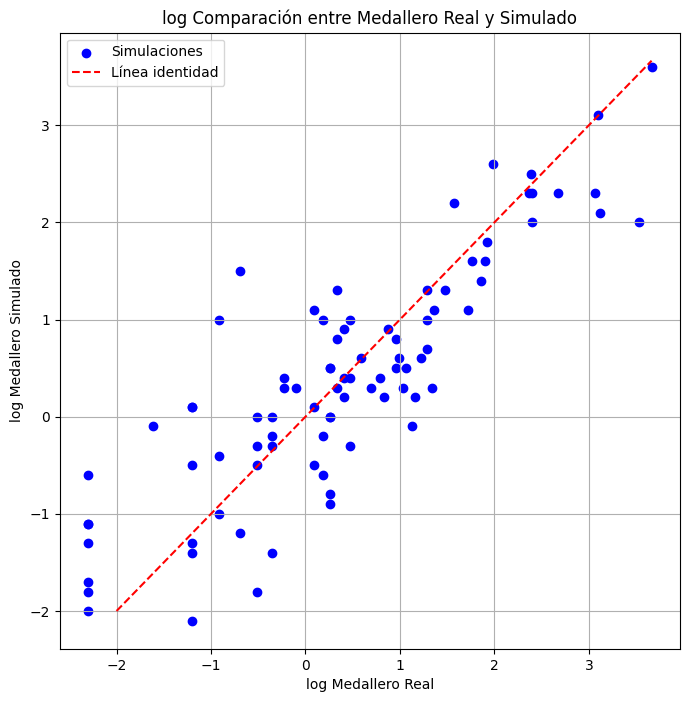

In [79]:
plt.figure(figsize=(8, 8))
plt.scatter(comparar['log_Med'], comparar['simulacion'], color='blue', label='Simulaciones')
plt.plot([-2, max(comparar['log_Med'])], [-2, max(comparar['log_Med'])], color='red', linestyle='--', label='Línea identidad')
plt.xlabel("log Medallero Real")
plt.ylabel("log Medallero Simulado")
plt.title("log Comparación entre Medallero Real y Simulado")
plt.legend()
plt.grid()
plt.show()

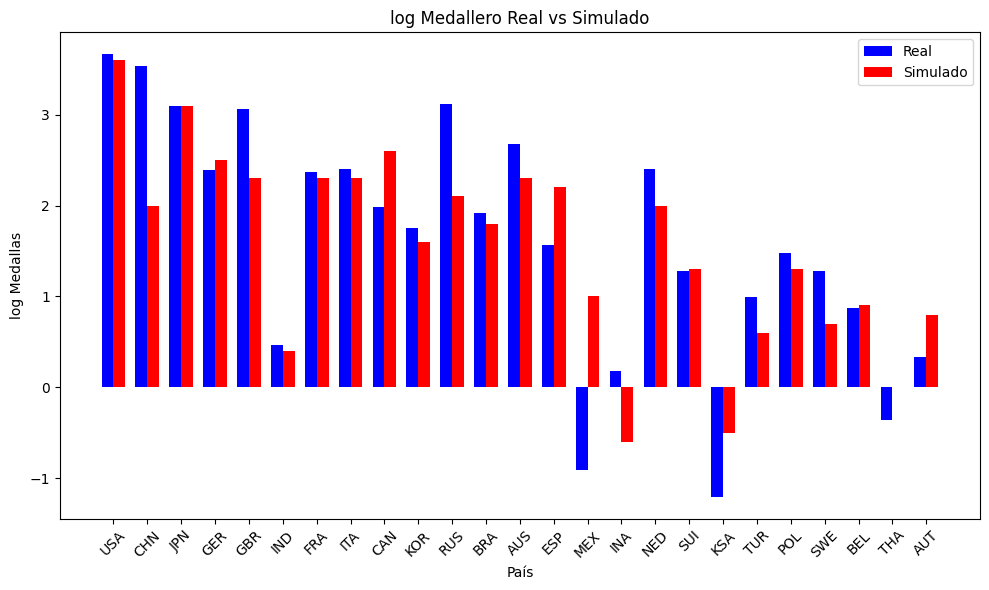

In [80]:
paises = comparar['Country'].head(25)
valores_reales = comparar['log_Med'].head(25)
valores_simulados = comparar['simulacion'].head(25)

x = np.arange(len(paises))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, valores_reales, width, label='Real', color='blue')
plt.bar(x + width/2, valores_simulados, width, label='Simulado', color='red')
plt.xticks(x, paises, rotation=45)
plt.xlabel("País")
plt.ylabel("log Medallas")
plt.title("log Medallero Real vs Simulado")
plt.legend()
plt.tight_layout()
plt.show()

In [81]:
# Gráfico interactivo
fig = px.scatter(df, x=comparar['log_Med'], y=comparar['simulacion'], text=comparar['Country'],
                 title='log Medallero Real vs Simulado',
                 labels={'x': 'log Medallero Real', 'y': 'log Medallero Simulado','text':'Pais'})
# Add a line for identity using Plotly's way
fig.add_shape(
    type='line',
    x0=min(comparar['log_Med']),
    y0=min(comparar['log_Med']),
    x1=max(comparar['log_Med']),
    y1=max(comparar['log_Med']),)
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

#Ahora analizaremos la variable y = log_MS, con variables base log_GDP y log_NU

In [82]:
# Load the dataframe
df = purosdatos

# Define the columns
base_X = ['log_GDP','log_Population']
y = 'log_Medals'
variables_interes = df.columns[df.columns.get_loc('log_Athlete'):].tolist()

# Function to perform the regressions
def regresiones_combinadas(df, base_X, y, variables_interes):
    resultados = pd.DataFrame(columns=['MSE', 'MAE', 'R2', 'Columnas'])

    for combinacion in combinations(variables_interes, 3):
        X = df[base_X + list(combinacion)]
        modelo = LinearRegression()
        modelo.fit(X, df[y])
        y_pred = modelo.predict(X)

        mse = mean_squared_error(df[y], y_pred)
        mae = mean_absolute_error(df[y], y_pred)
        r2 = r2_score(df[y], y_pred)

        # Concatenate the results into the DataFrame
        resultados = pd.concat([resultados, pd.DataFrame({
            'MSE': [mse],
            'MAE': [mae],
            'R2': [r2],
            'Columnas': [combinacion]
        })], ignore_index=True)

    return resultados.sort_values(by='R2', ascending=False)

# Call the function and display the results
resultados = regresiones_combinadas(df, base_X, y, variables_interes)
resultados

<ipython-input-82-c6d224d4fcc0>:24: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,MSE,MAE,R2,Columnas
18,0.368500,0.483074,0.753533,"(log_Athlete, Education_proportion, Health_pro..."
21,0.399902,0.501699,0.732530,"(log_Athlete, Education_proportion, Corruption)"
20,0.404859,0.505035,0.729215,"(log_Athlete, Education_proportion, calorias_p..."
2,0.404944,0.507072,0.729158,"(log_Athlete, Pop_over_65, Education_proportion)"
23,0.408093,0.507147,0.727052,"(log_Athlete, Health_proportion, calorias_per_..."
...,...,...,...,...
66,0.726448,0.712645,0.514124,"(Military_proportion, Education_proportion, ca..."
57,0.726864,0.717927,0.513846,"(Urban Pop, Education_proportion, Corruption)"
77,0.727016,0.711806,0.513744,"(Education_proportion, Life E, calorias_per_ca..."
49,0.729253,0.716819,0.512248,"(Urban Pop, Military_proportion, Education_pro..."


#nuevamente misma tabla comparativa y graficos de resultados

In [83]:
#regresion de variables base X y columnas con mejor R2

# Ajustar el modelo de regresión lineal multivariada
model_top1_4 = smf.ols('log_Medals ~ log_GDP + log_Population + log_Athlete + Education_proportion + Health_proportion', data=purosdatos).fit()

# Imprimir el resumen del modelo
print(model_top1_4.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Medals   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     49.53
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           3.12e-23
Time:                        01:00:05   Log-Likelihood:                -80.021
No. Observations:                  87   AIC:                             172.0
Df Residuals:                      81   BIC:                             186.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.0293 

In [84]:
y_pred = model_top1_4.predict(purosdatos)
mse_4 = mean_squared_error(purosdatos['log_Medals'], y_pred)
mae_4 = mean_absolute_error(purosdatos['log_Medals'], y_pred)
r2_4 = r2_score(purosdatos['log_Medals'], y_pred)
aic_4 = model_top1_4.aic
bic_4 = model_top1_4.bic
print(f'MSE Modelo top1_4: {mse_4}')
print(f'MAE Modelo top1_4: {mae_4}')
print(f'R2 Modelo top1_4: {r2_4}')
print(f'AIC Modelo top1_4: {aic_4}')
print(f'BIC Modelo top1_4: {bic_4}')

MSE Modelo top1_4: 0.36850009228832403
MAE Modelo top1_4: 0.4830741187778171
R2 Modelo top1_4: 0.7535331921201289
AIC Modelo top1_4: 172.04195920648095
BIC Modelo top1_4: 186.83740791840845


In [85]:
#solo columna 'log_Med' y 'Country' de df_general
df_general_medallas = df_general[['Country','log_Medals']]

In [86]:
medallas_sim = y_pred.round(1)

comparar = pd.concat([df_general_medallas, medallas_sim,abs(df_general_medallas['log_Medals']-medallas_sim)], axis=1)
#poner titulos a comparar '0' por 'simulacion', '1' por 'diferencia'
comparar.rename(columns={0: 'simulacion', 1: 'diferencia'}, inplace=True)
comparar

,Country,log_Medals,simulacion,diferencia
0,USA,4.727388,4.5,0.227388
1,CHN,4.488636,3.1,1.388636
2,JPN,4.060443,4.0,0.060443
3,GER,3.610918,3.5,0.110918
4,GBR,4.158883,3.4,0.758883
...,...,...,...,...
82,BAH,0.693147,0.9,0.206853
83,KGZ,1.098612,0.3,0.798612
84,BER,0.000000,-0.6,0.600000
85,SMR,1.098612,-0.0,1.098612


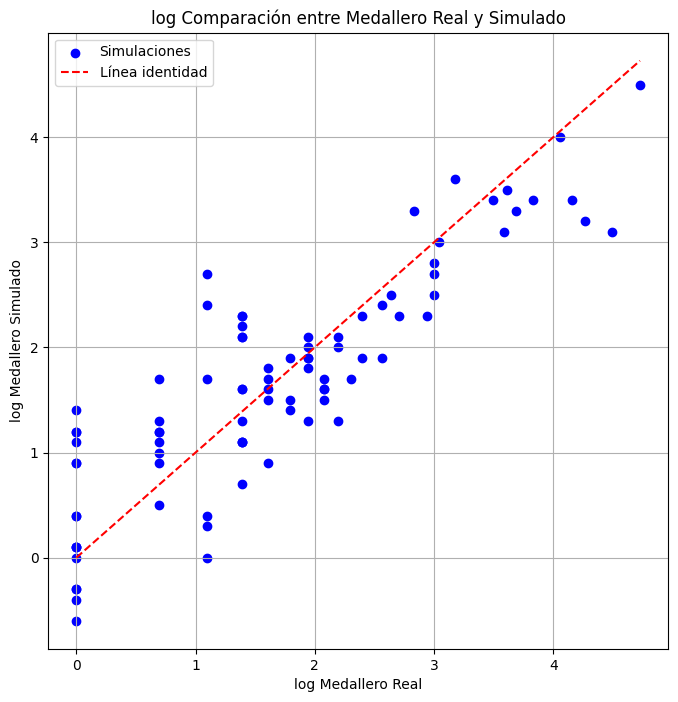

In [87]:
plt.figure(figsize=(8, 8))
plt.scatter(comparar['log_Medals'], comparar['simulacion'], color='blue', label='Simulaciones')
plt.plot([0, max(comparar['log_Medals'])], [0, max(comparar['log_Medals'])], color='red', linestyle='--', label='Línea identidad')
plt.xlabel("log Medallero Real")
plt.ylabel("log Medallero Simulado")
plt.title("log Comparación entre Medallero Real y Simulado")
plt.legend()
plt.grid()
plt.show()

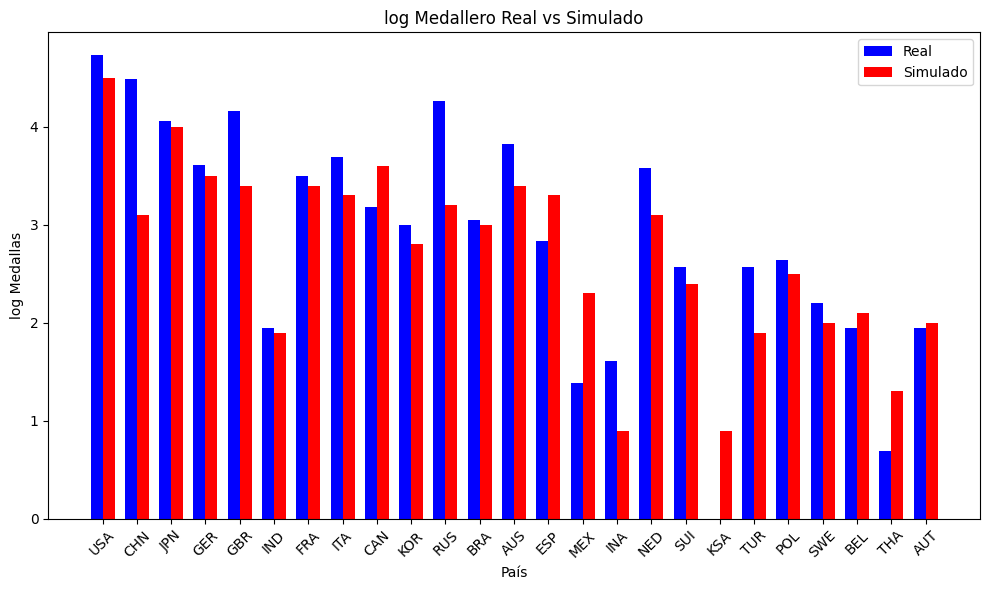

In [88]:
paises = comparar['Country'].head(25)
valores_reales = comparar['log_Medals'].head(25)
valores_simulados = comparar['simulacion'].head(25)

x = np.arange(len(paises))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, valores_reales, width, label='Real', color='blue')
plt.bar(x + width/2, valores_simulados, width, label='Simulado', color='red')
plt.xticks(x, paises, rotation=45)
plt.xlabel("País")
plt.ylabel("log Medallas")
plt.title("log Medallero Real vs Simulado")
plt.legend()
plt.tight_layout()
plt.show()

In [89]:
# Gráfico interactivo
fig = px.scatter(df, x=comparar['log_Medals'], y=comparar['simulacion'], text=comparar['Country'],
                 title='log Medallero Real vs Simulado',
                 labels={'x': 'log Medallero Real', 'y': 'log Medallero Simulado','text':'Pais'})
# Add a line for identity using Plotly's way
fig.add_shape(
    type='line',
    x0=min(comparar['log_Medals']),
    y0=min(comparar['log_Medals']),
    x1=max(comparar['log_Medals']),
    y1=max(comparar['log_Medals']),)
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

#seguimos ahora con los modelos de y = MS , variables base GDP y NU

In [90]:
# Load the dataframe
df = purosdatos

# Define the columns
base_X = ['GDP','Population']
y = 'Total'
variables_interes = df.columns[df.columns.get_loc('Athlete'):].tolist()

# Function to perform the regressions
def regresiones_combinadas(df, base_X, y, variables_interes):
    resultados = pd.DataFrame(columns=['MSE', 'MAE', 'R2', 'Columnas'])

    for combinacion in combinations(variables_interes, 3):
        X = df[base_X + list(combinacion)]
        modelo = LinearRegression()
        modelo.fit(X, df[y])
        y_pred = modelo.predict(X)

        mse = mean_squared_error(df[y], y_pred)
        mae = mean_absolute_error(df[y], y_pred)
        r2 = r2_score(df[y], y_pred)

        # Concatenate the results into the DataFrame
        resultados = pd.concat([resultados, pd.DataFrame({
            'MSE': [mse],
            'MAE': [mae],
            'R2': [r2],
            'Columnas': [combinacion]
        })], ignore_index=True)

    return resultados.sort_values(by='R2', ascending=False)

# Call the function and display the results
resultados = regresiones_combinadas(df, base_X, y, variables_interes)
resultados

<ipython-input-90-6e02e56d855b>:24: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,MSE,MAE,R2,Columnas
21,45.415999,4.228991,0.880654,"(Athlete, Military_proportion, Education_propo..."
2,45.963197,4.203576,0.879216,"(Athlete, log_Athlete, Military_proportion)"
24,45.986546,4.218145,0.879155,"(Athlete, Military_proportion, calorias_per_ca..."
15,46.039976,4.202770,0.879014,"(Athlete, Urban Pop, Military_proportion)"
22,46.104750,4.266409,0.878844,"(Athlete, Military_proportion, Health_proportion)"
...,...,...,...,...
89,109.130806,6.620851,0.713222,"(Urban Pop, Military_proportion, Corruption)"
92,109.578067,6.538865,0.712047,"(Urban Pop, Education_proportion, calorias_per..."
103,110.118060,6.555895,0.710628,"(Military_proportion, Education_proportion, Co..."
85,110.343529,6.647989,0.710035,"(Urban Pop, Military_proportion, Education_pro..."


In [91]:
#regresion de variables base X y columnas con mejor R2

# Ajustar el modelo de regresión lineal multivariada
model_top1_5 = smf.ols('Total ~ GDP + Population + Athlete + Military_proportion + Education_proportion', data=purosdatos).fit()

# Imprimir el resumen del modelo
print(model_top1_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     119.5
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           6.88e-36
Time:                        01:00:07   Log-Likelihood:                -289.44
No. Observations:                  87   AIC:                             590.9
Df Residuals:                      81   BIC:                             605.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.3633 

In [92]:
y_pred = model_top1_5.predict(purosdatos)
mse_5 = mean_squared_error(purosdatos['Total'], y_pred)
mae_5 = mean_absolute_error(purosdatos['Total'], y_pred)
r2_5 = r2_score(purosdatos['Total'], y_pred)
aic_5 = model_top1_5.aic
bic_5 = model_top1_5.bic
print(f'MSE Modelo top1_5: {mse_5}')
print(f'MAE Modelo top1_5: {mae_5}')
print(f'R2 Modelo top1_5: {r2_5}')
print(f'AIC Modelo top1_5: {aic_5}')
print(f'BIC Modelo top1_5: {bic_5}')

MSE Modelo top1_5: 45.41599880587087
MAE Modelo top1_5: 4.228991176261905
R2 Modelo top1_5: 0.8806540901576576
AIC Modelo top1_5: 590.875511020663
BIC Modelo top1_5: 605.6709597325905


In [93]:
#solo columna 'log_Med' y 'Country' de df_general
df_general_medallas = df_general[['Country','Total']]

In [94]:
medallas_sim = y_pred.round(1)

comparar = pd.concat([df_general_medallas, medallas_sim,abs(df_general_medallas['Total']-medallas_sim)], axis=1)
#poner titulos a comparar '0' por 'simulacion', '1' por 'diferencia'
comparar.rename(columns={0: 'simulacion', 1: 'diferencia'}, inplace=True)
comparar

,Country,Total,simulacion,diferencia
0,USA,113,118.2,5.2
1,CHN,89,77.8,11.2
2,JPN,58,62.5,4.5
3,GER,37,46.6,9.6
4,GBR,64,39.4,24.6
...,...,...,...,...
82,BAH,2,2.2,0.2
83,KGZ,3,-0.6,3.6
84,BER,1,1.8,0.8
85,SMR,3,0.8,2.2


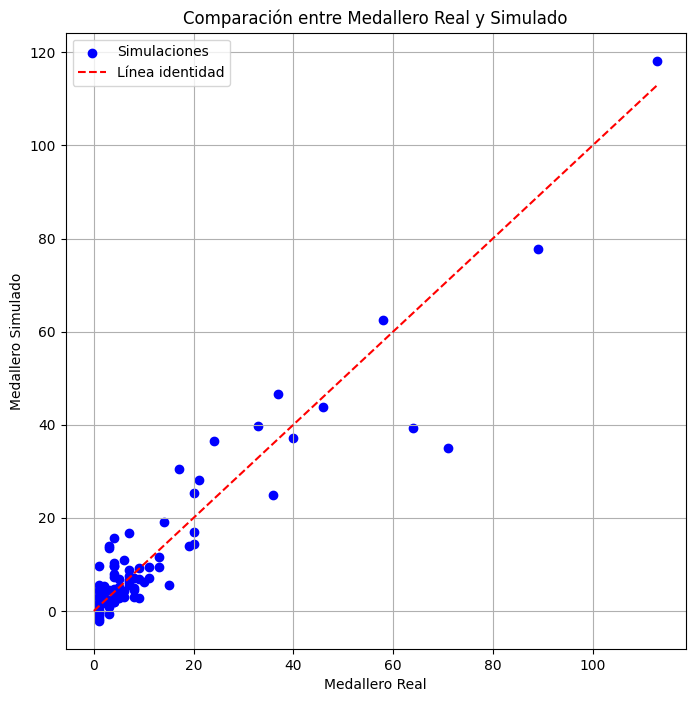

In [95]:
plt.figure(figsize=(8, 8))
plt.scatter(comparar['Total'], comparar['simulacion'], color='blue', label='Simulaciones')
plt.plot([0, max(comparar['Total'])], [0, max(comparar['Total'])], color='red', linestyle='--', label='Línea identidad')
plt.xlabel("Medallero Real")
plt.ylabel("Medallero Simulado")
plt.title("Comparación entre Medallero Real y Simulado")
plt.legend()
plt.grid()
plt.show()

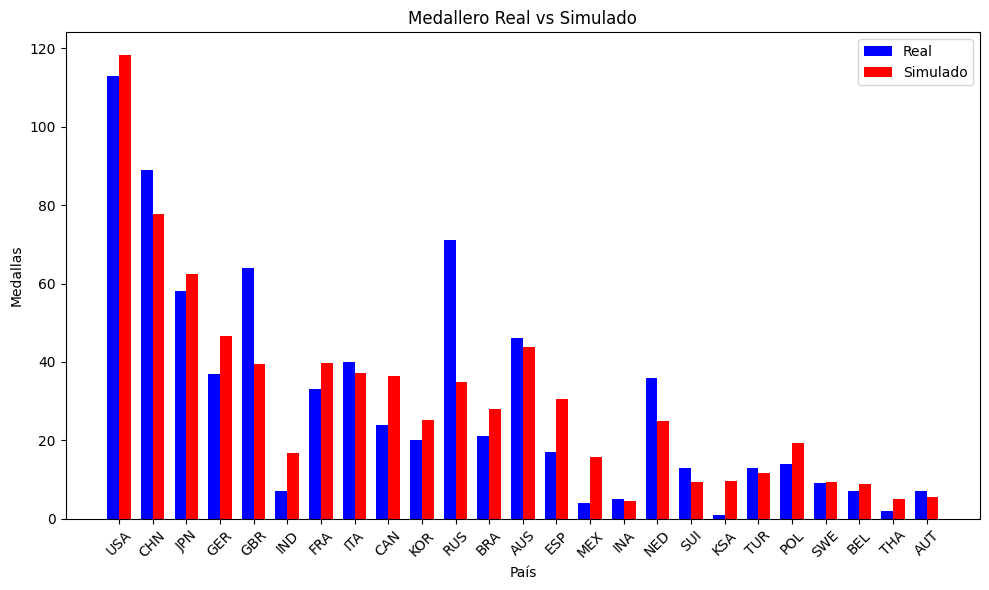

In [96]:
paises = comparar['Country'].head(25)
valores_reales = comparar['Total'].head(25)
valores_simulados = comparar['simulacion'].head(25)

x = np.arange(len(paises))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, valores_reales, width, label='Real', color='blue')
plt.bar(x + width/2, valores_simulados, width, label='Simulado', color='red')
plt.xticks(x, paises, rotation=45)
plt.xlabel("País")
plt.ylabel("Medallas")
plt.title("Medallero Real vs Simulado")
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
# Gráfico interactivo
fig = px.scatter(df, x=comparar['Total'], y=comparar['simulacion'], text=comparar['Country'],
                 title='log Medallero Real vs Simulado',
                 labels={'x': 'Medallero Real', 'y': 'Medallero Simulado','text':'Pais'})
# Add a line for identity using Plotly's way
fig.add_shape(
    type='line',
    x0=min(comparar['Total']),
    y0=min(comparar['Total']),
    x1=max(comparar['Total']),
    y1=max(comparar['Total']),)
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

#seguimos ahora con los modelos de y = MS , variables base log(GDP) y log(NU)

In [98]:
# Load the dataframe
df = purosdatos

# Define the columns
base_X = ['log_GDP','log_Population']
y = 'Total'
variables_interes = df.columns[df.columns.get_loc('Athlete'):].tolist()

# Function to perform the regressions
def regresiones_combinadas(df, base_X, y, variables_interes):
    resultados = pd.DataFrame(columns=['MSE', 'MAE', 'R2', 'Columnas'])

    for combinacion in combinations(variables_interes, 3):
        X = df[base_X + list(combinacion)]
        modelo = LinearRegression()
        modelo.fit(X, df[y])
        y_pred = modelo.predict(X)

        mse = mean_squared_error(df[y], y_pred)
        mae = mean_absolute_error(df[y], y_pred)
        r2 = r2_score(df[y], y_pred)

        # Concatenate the results into the DataFrame
        resultados = pd.concat([resultados, pd.DataFrame({
            'MSE': [mse],
            'MAE': [mae],
            'R2': [r2],
            'Columnas': [combinacion]
        })], ignore_index=True)

    return resultados.sort_values(by='R2', ascending=False)

# Call the function and display the results
resultados = regresiones_combinadas(df, base_X, y, variables_interes)
resultados

<ipython-input-98-060057716b11>:24: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,MSE,MAE,R2,Columnas
2,78.658392,5.698523,0.793298,"(Athlete, log_Athlete, Military_proportion)"
1,80.433062,5.643221,0.788635,"(Athlete, log_Athlete, Urban Pop)"
7,80.475534,5.630039,0.788523,"(Athlete, log_Athlete, Corruption)"
6,80.554240,5.664906,0.788316,"(Athlete, log_Athlete, calorias_per_capita_per..."
3,80.676401,5.525782,0.787995,"(Athlete, log_Athlete, Education_proportion)"
...,...,...,...,...
108,215.704793,10.445242,0.433163,"(Military_proportion, Life E, Corruption)"
97,216.496073,10.478857,0.431083,"(Urban Pop, Life E, calorias_per_capita_per_dia)"
99,216.602030,10.481178,0.430805,"(Urban Pop, calorias_per_capita_per_dia, Corru..."
119,216.720462,10.510377,0.430494,"(Life E, calorias_per_capita_per_dia, Corruption)"


In [99]:
#regresion de variables base X y columnas con mejor R2

# Ajustar el modelo de regresión lineal multivariada
model_top1_6 = smf.ols('Total ~ log_GDP + log_Population + Athlete + log_Athlete + Military_proportion', data=purosdatos).fit()

# Imprimir el resumen del modelo
print(model_top1_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     62.17
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           2.70e-26
Time:                        01:00:10   Log-Likelihood:                -313.33
No. Observations:                  87   AIC:                             638.7
Df Residuals:                      81   BIC:                             653.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.1338    

In [100]:
y_pred = model_top1_6.predict(purosdatos)
mse_6 = mean_squared_error(purosdatos['Total'], y_pred)
mae_6 = mean_absolute_error(purosdatos['Total'], y_pred)
r2_6 = r2_score(purosdatos['Total'], y_pred)
aic_6 = model_top1_6.aic
bic_6 = model_top1_6.bic
print(f'MSE Modelo top1_6: {mse_6}')
print(f'MAE Modelo top1_6: {mae_6}')
print(f'R2 Modelo top1_6: {r2_6}')
print(f'AIC Modelo top1_6: {aic_6}')
print(f'BIC Modelo top1_6: {bic_6}')

MSE Modelo top1_6: 78.65839196628323
MAE Modelo top1_6: 5.698522737715871
R2 Modelo top1_6: 0.7932984498242908
AIC Modelo top1_6: 638.6602509617583
BIC Modelo top1_6: 653.4556996736858


In [101]:
#solo columna 'log_Med' y 'Country' de df_general
df_general_medallas = df_general[['Country','Total']]

In [102]:
medallas_sim = y_pred.round(1)

comparar = pd.concat([df_general_medallas, medallas_sim,abs(df_general_medallas['Total']-medallas_sim)], axis=1)
#poner titulos a comparar '0' por 'simulacion', '1' por 'diferencia'
comparar.rename(columns={0: 'simulacion', 1: 'diferencia'}, inplace=True)
comparar

,Country,Total,simulacion,diferencia
0,USA,113,83.6,29.4
1,CHN,89,52.2,36.8
2,JPN,58,70.6,12.6
3,GER,37,52.0,15.0
4,GBR,64,45.6,18.4
...,...,...,...,...
82,BAH,2,-0.6,2.6
83,KGZ,3,1.4,1.6
84,BER,1,5.2,4.2
85,SMR,3,0.9,2.1


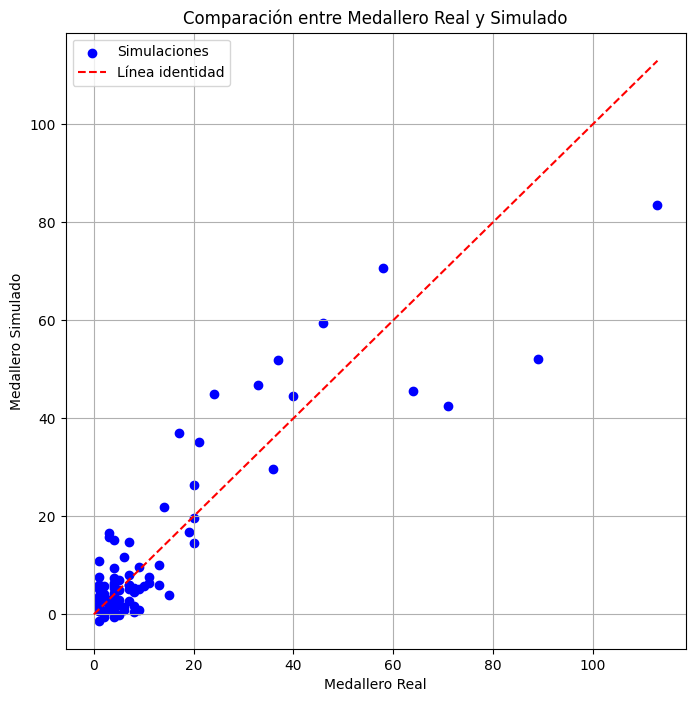

In [103]:
plt.figure(figsize=(8, 8))
plt.scatter(comparar['Total'], comparar['simulacion'], color='blue', label='Simulaciones')
plt.plot([0, max(comparar['Total'])], [0, max(comparar['Total'])], color='red', linestyle='--', label='Línea identidad')
plt.xlabel("Medallero Real")
plt.ylabel("Medallero Simulado")
plt.title("Comparación entre Medallero Real y Simulado")
plt.legend()
plt.grid()
plt.show()

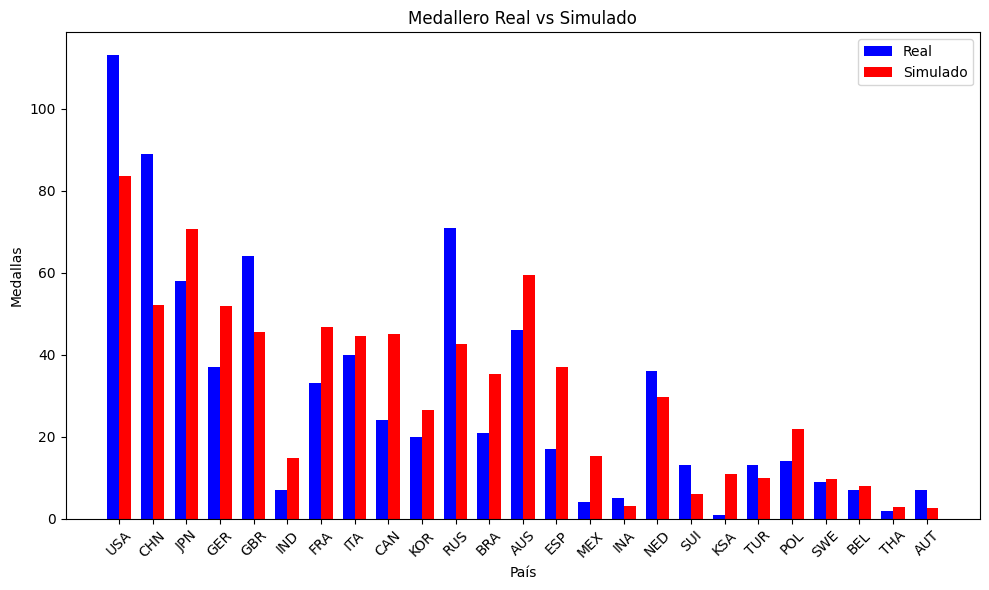

In [104]:
paises = comparar['Country'].head(25)
valores_reales = comparar['Total'].head(25)
valores_simulados = comparar['simulacion'].head(25)

x = np.arange(len(paises))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, valores_reales, width, label='Real', color='blue')
plt.bar(x + width/2, valores_simulados, width, label='Simulado', color='red')
plt.xticks(x, paises, rotation=45)
plt.xlabel("País")
plt.ylabel("Medallas")
plt.title("Medallero Real vs Simulado")
plt.legend()
plt.tight_layout()
plt.show()

In [105]:
# Gráfico interactivo
fig = px.scatter(df, x=comparar['Total'], y=comparar['simulacion'], text=comparar['Country'],
                 title='log Medallero Real vs Simulado',
                 labels={'x': 'Medallero Real', 'y': 'Medallero Simulado','text':'Pais'})
# Add a line for identity using Plotly's way
fig.add_shape(
    type='line',
    x0=min(comparar['Total']),
    y0=min(comparar['Total']),
    x1=max(comparar['Total']),
    y1=max(comparar['Total']),)
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

#se realia una tabla comparativa del rendimiento y coeficientes de los 6 modelos de interes para realizar un analisis mas profundo y posteriormente una validacion cruzada y train-test

In [106]:
#parametros los 6 modelos top1
tabla_parametros = pd.concat([model_top1_1.params,model_top1_1.tvalues
                   ,model_top1_2.params,model_top1_2.tvalues
                   ,model_top1_3.params,model_top1_3.tvalues
                   ,model_top1_4.params,model_top1_4.tvalues
                   ,model_top1_5.params,model_top1_5.tvalues
                   ,model_top1_6.params,model_top1_6.tvalues], axis=1)
tabla_parametros.columns = ['Modelo 1','t1', 'Modelo 2','t2', 'Modelo 3','t3', 'Modelo 4','t4', 'Modelo 5','t5', 'Modelo 6','t6']
tabla_parametros.fillna(' ', inplace=True)
tabla_parametros

<ipython-input-106-37a34e520801>:9: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value ' ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,Modelo 1,t1,Modelo 2,t2,Modelo 3,t3,Modelo 4,t4,Modelo 5,t5,Modelo 6,t6
Intercept,2.874993,1.221619,-2.599121,-0.315895,-2.521827,-1.473538,-1.029336,-0.734174,1.363323,0.421685,-3.133778,-0.144113
GDP,0.0,8.670839,,,,,,,0.0,7.313081,,
Population,-0.0,-0.13676,,,,,,,-0.0,-0.42292,,
Athlete,0.025097,8.367245,0.054515,10.192167,,,,,0.086113,11.135583,0.156519,11.072296
Pop_over_65,0.058783,1.271221,,,,,,,,,,
calorias_per_capita_per_dia,-0.001224,-1.523473,,,,,,,,,,
log_GDP,,,0.085485,0.182173,-0.00268,-0.025539,-0.046974,-0.546464,,,-0.061838,-0.049862
log_Population,,,0.309226,0.926696,-0.027483,-0.315141,0.040775,0.570732,,,0.916581,1.039325
log_Athlete,,,-1.919568,-2.761999,0.88816,6.71135,0.798812,7.368165,,,-4.614311,-2.512149
Military_proportion,,,0.342545,1.270212,,,,,0.808724,1.511416,1.167914,1.638658


In [107]:
#tabla comparativa de mae,msa, r2,aic,bic de los 6 modelos
metricas_modelos = pd.DataFrame({
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5', 'Modelo 6'],
    'MAE': [mae_1,mae_2,mae_3,mae_4,mae_5,mae_6],
    'MSE': [mse_1,mse_2,mse_3,mse_4,mse_5,mse_6],
    'R2': [r2_1,r2_2,r2_3,r2_4,r2_5,r2_6],
    'AIC': [aic_1,aic_2,aic_3,aic_4,aic_5,aic_6],
    'BIC': [bic_1,bic_2,bic_3,bic_4,bic_5,bic_6]
})
metricas_modelos

,Modelo,MAE,MSE,R2,AIC,BIC
0,Modelo 1,1.408865,5.771484,0.875236,411.400148,426.195597
1,Modelo 2,2.088137,11.261139,0.756563,469.553432,484.348880
2,Modelo 3,0.574161,0.549073,0.722880,206.736715,221.532164
3,Modelo 4,0.483074,0.368500,0.753533,172.041959,186.837408
4,Modelo 5,4.228991,45.415999,0.880654,590.875511,605.670960
5,Modelo 6,5.698523,78.658392,0.793298,638.660251,653.455700


#como primeras conclusiones de los modelos GDP es una variable de vital importancia, de misma forma que Athlete y log(ATH), en sus respectivos modelos, las proporciones de gdp de educacion, militar y salud, son relevantes no con la misma fuerza que las mencionadas anteriormente

In [108]:
#juntar los residuos en un solo data frame para graficarlos con un ciclo
residuos_df = pd.DataFrame({
    'Residuos Modelo 1': model_top1_1.resid,
    'Residuos Modelo 2': model_top1_2.resid,
    'Residuos Modelo 3': model_top1_3.resid,
    'Residuos Modelo 4': model_top1_4.resid,
    'Residuos Modelo 5': model_top1_5.resid,
    'Residuos Modelo 6': model_top1_6.resid
})

valores_ajustados_df = pd.DataFrame({
    'Valores Ajustados Modelo 1': model_top1_1.fittedvalues,
    'Valores Ajustados Modelo 2': model_top1_2.fittedvalues,
    'Valores Ajustados Modelo 3': model_top1_3.fittedvalues,
    'Valores Ajustados Modelo 4': model_top1_4.fittedvalues,
    'Valores Ajustados Modelo 5': model_top1_5.fittedvalues,
    'Valores Ajustados Modelo 6': model_top1_6.fittedvalues
})

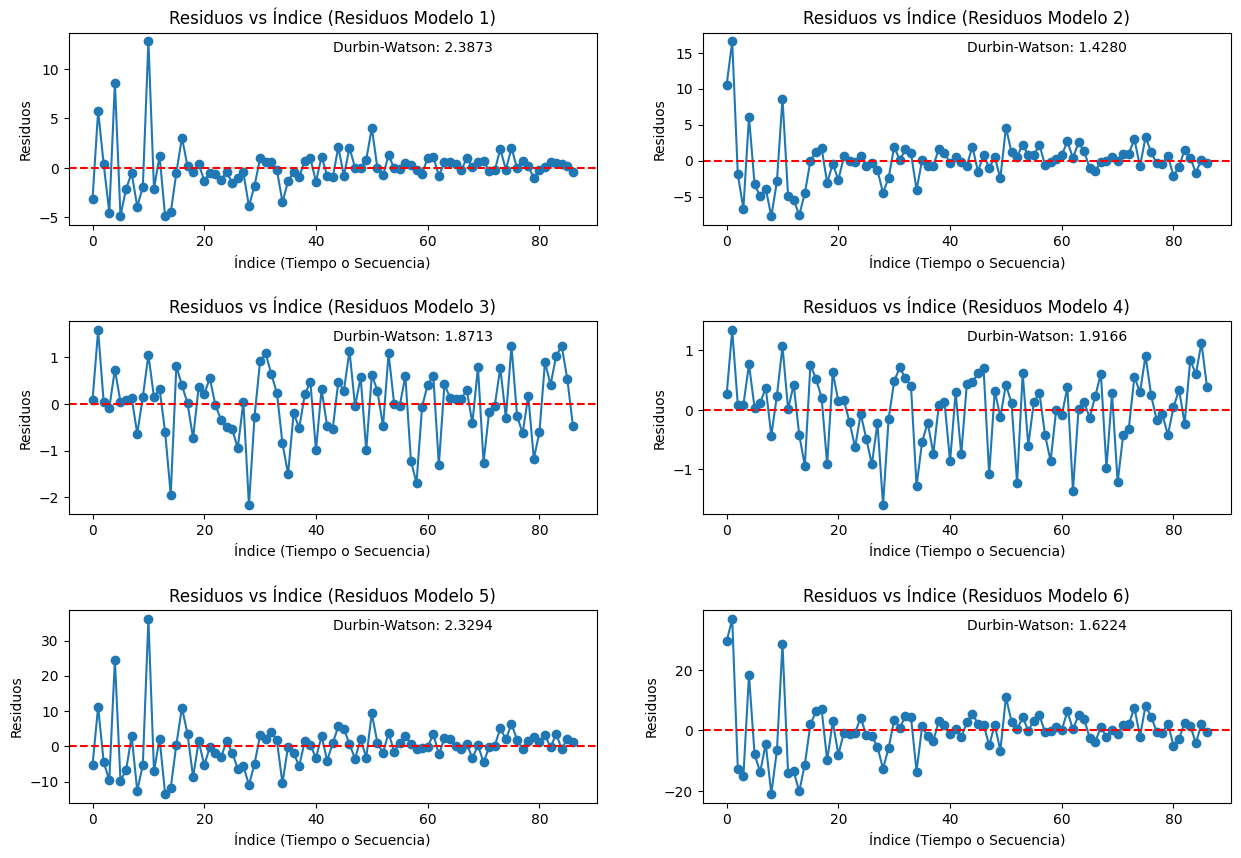

In [109]:
#ahora en un subplots de residuos vs indices de cada modelo
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)
for i, residuo_col in enumerate(residuos_df.columns):
    axes[i].plot(residuos_df.index, residuos_df[residuo_col], marker='o', linestyle='-', label=residuo_col)
    axes[i].axhline(0, color='red', linestyle='--', label='Referencia (0)')
    axes[i].set_title(f"Residuos vs Índice ({residuo_col})")
    axes[i].set_xlabel("Índice (Tiempo o Secuencia)")
    axes[i].set_ylabel("Residuos")
    #prueba durbin-watson como comentario en cada grafico
    durbin_watson_test = durbin_watson(residuos_df[residuo_col])
    axes[i].annotate(f'Durbin-Watson: {durbin_watson_test:.4f}', xy=(0.5, 0.90), xycoords='axes fraction', fontsize=10)

Prueba de Kolmogorov-Smirnov: Estadístico=0.07163632133792242, p-valor=0.7359289345137328


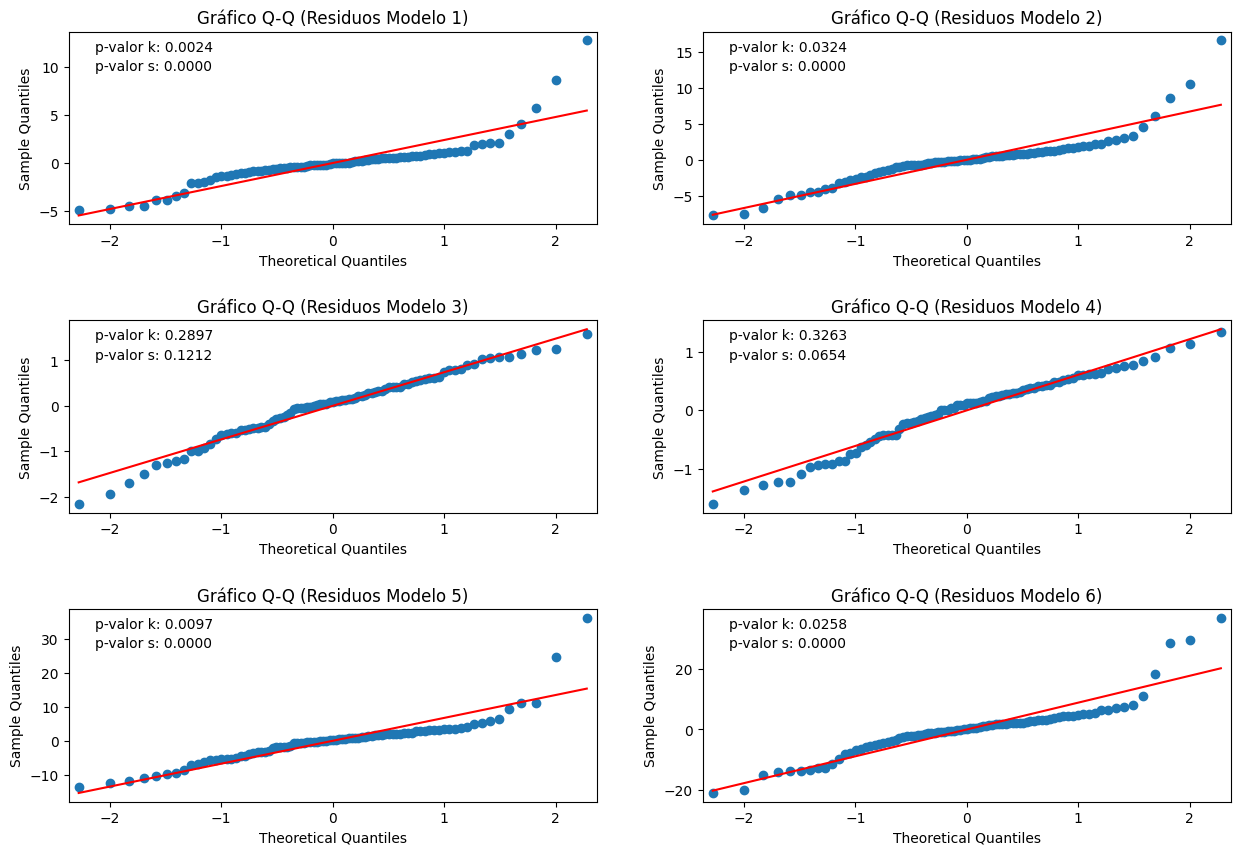

In [110]:
#normalidad de errores
print(f"Prueba de Kolmogorov-Smirnov: Estadístico={ks_stat}, p-valor={ks_p}")
# 2. Gráfico Q-Q (Quantile-Quantile) de cada modelo
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)
for i, residuo_col in enumerate(residuos_df.columns):
    sm.qqplot(residuos_df[residuo_col], line='s', ax=axes[i])
    axes[i].set_title(f"Gráfico Q-Q ({residuo_col})")
    #como comentario en cada grafico se anota su p-valor de kolmogorov-smirnoff
    p_value = stats.kstest(residuos_df[residuo_col], 'norm',args=(np.mean(residuos_df[residuo_col]),np.std(residuos_df[residuo_col]))).pvalue
    axes[i].annotate(f'p-valor k: {p_value:.4f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10)
    #lo mismo con shapiro
    shapirop = stats.shapiro(residuos_df[residuo_col]).pvalue
    axes[i].annotate(f'p-valor s: {shapirop:.4f}', xy=(0.05, 0.80), xycoords='axes fraction', fontsize=10)

#como era de esperarse vemos un comportamiento mas normal de errores el los modelos con y logaritmica, al obsrvar el comportaiento de colas derechas de las distribuciones

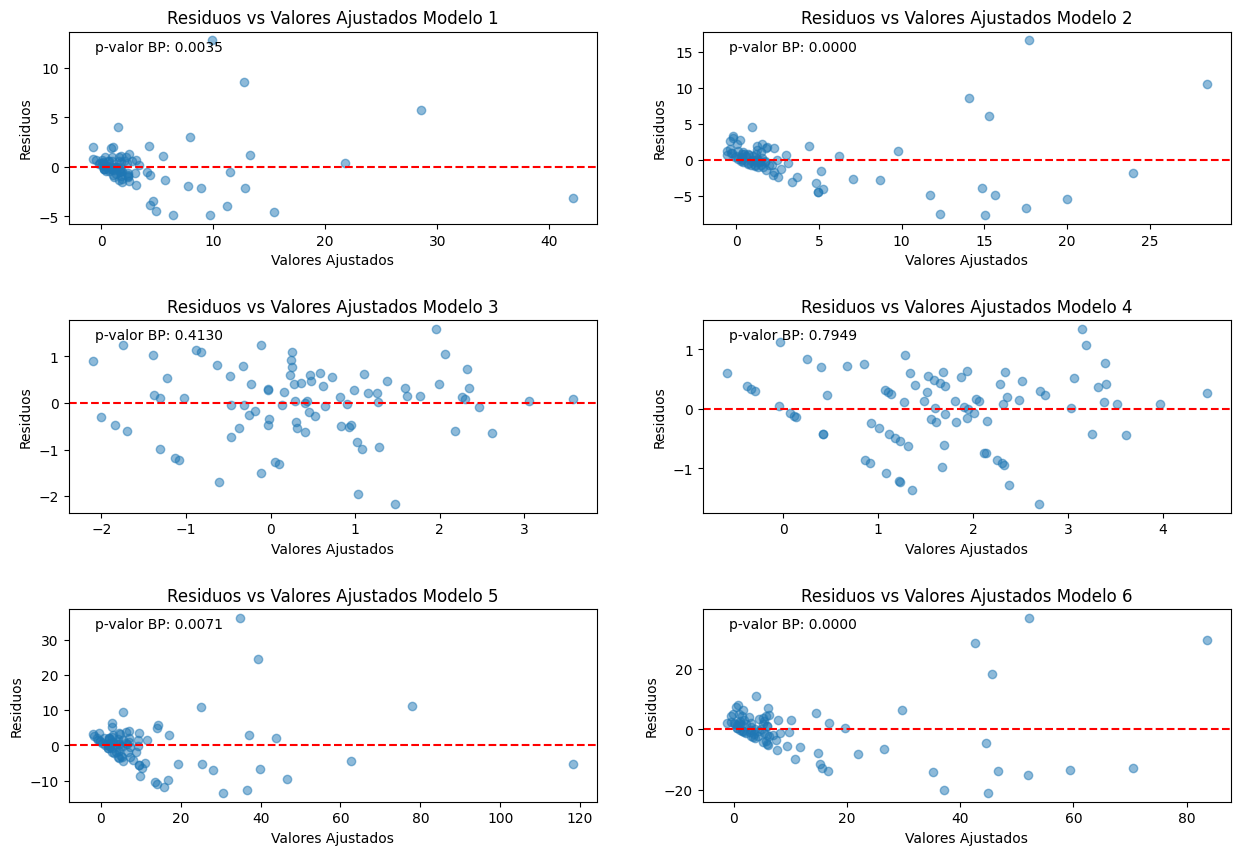

In [111]:
#ahora con la homocedasticidad
# Gráfico 1: Residuos vs Valores Ajustados
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)
for i, residuo_col in enumerate(residuos_df.columns):
    # Extract the model number from the residuo_col name
    model_number = residuo_col.split(' ')[-1]  # Get the last part (e.g., 'Modelo 1')
    # Construct the correct column name for valores_ajustados_df
    valores_ajustados_col = f'Valores Ajustados Modelo {model_number}'
    axes[i].scatter(valores_ajustados_df[valores_ajustados_col], residuos_df[residuo_col], alpha=0.5)
    axes[i].axhline(0, color='red', linestyle='--')
    axes[i].set_title(f"Residuos vs Valores Ajustados Modelo {model_number}")
    axes[i].set_xlabel("Valores Ajustados")
    axes[i].set_ylabel("Residuos")
    # Prueba de Breusch-Pagan se anota p-valor en cada grafico
    bp_pvalue = het_breuschpagan(residuos_df[residuo_col], sm.add_constant(valores_ajustados_df[valores_ajustados_col]))[1]
    axes[i].annotate(f'p-valor BP: {bp_pvalue:.4f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10)

In [112]:
#Multicolinealidad
#modelo 1
X = sm.add_constant(purosdatos[['GDP', 'Population','Athlete', 'Pop_over_65', 'calorias_per_capita_per_dia']])
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif_data)

                      Variable        VIF
0                        const  77.731976
1                          GDP   2.483920
2                   Population   1.587920
3                      Athlete   2.274587
4                  Pop_over_65   1.510509
5  calorias_per_capita_per_dia   1.442972


In [113]:
#Modelo 2 y 6
X = sm.add_constant(purosdatos[['log_GDP', 'log_Population','Athlete', 'log_Athlete', 'Military_proportion']])
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif_data)

              Variable         VIF
0                const  486.934472
1              log_GDP    5.762414
2       log_Population    2.787144
3              Athlete    3.707022
4          log_Athlete    5.005371
5  Military_proportion    1.067986


In [114]:
#modelo 3 y 4
X = sm.add_constant(purosdatos[['log_GDP', 'log_Population','log_Athlete','Education_proportion','Health_proportion']])
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif_data)

               Variable         VIF
0                 const  432.078865
1               log_GDP    5.909287
2        log_Population    3.904341
3           log_Athlete    3.722129
4  Education_proportion    1.195165
5     Health_proportion    2.035562


In [115]:
#modelo 5
X = sm.add_constant(purosdatos[['GDP', 'Population','Athlete','Education_proportion','Military_proportion']])
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif_data)

               Variable        VIF
0                 const  18.642263
1                   GDP   2.507704
2            Population   1.512054
3               Athlete   1.921403
4  Education_proportion   1.036946
5   Military_proportion   1.042533


#en general se busca un vif menor que 5 ya que El VIF es una estadística que se utiliza en el análisis de regresión para detectar multicolinealidad. La multicolinealidad ocurre cuando dos o más variables independientes en un modelo de regresión están altamente correlacionadas entre sí. Un VIF alto indica que una variable independiente está muy correlacionada con las demás, lo que puede inflar la varianza de los coeficientes de regresión y hacer que las pruebas de significancia sean menos confiables, el vif de la constante no tiene relevancia

#Una vez realizada el analisis de los coeficientes, supuestos y demas detalles de los 6 modelos, concluyendo que variables si son de importancia, modelo que cumple con mas cosas, se realizan las pruebas cruzadas de k-folds

en este caso modelo 3 y 4

In [116]:
purosdatos.columns

Index(['GDP', 'log_GDP', 'Total', 'MED', 'log_Med', 'log_Medals', 'Population',
       'log_Population', 'Athlete', 'log_Athlete', 'Pop_over_65', 'Urban Pop',
       'Military_proportion', 'Education_proportion', 'Health_proportion',
       'Life E', 'calorias_per_capita_per_dia', 'Corruption'],
      dtype='object')

In [117]:
#validacion cruzada de folds modelo 4
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_m3 = purosdatos[['log_GDP', 'log_Population', 'log_Athlete', 'Education_proportion','Health_proportion']]  # Variables independientes modelo 3
y_m3 = purosdatos['log_Med']  # Variable dependiente

# Configuración de K-Fold (4 folds)
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Modelo de regresión lineal
model_m3 = LinearRegression()

# Listas para guardar métricas de cada fold
mae_scores = []
mse_scores = []
r2_scores = []

# Ciclo para calcular métricas fold por fold
for fold, (train_index, test_index) in enumerate(kf.split(X_m3), 1):
    # Dividir los datos
    X_train, X_test = X_m3.iloc[train_index], X_m3.iloc[test_index]
    y_train, y_test = y_m3.iloc[train_index], y_m3.iloc[test_index]

    # Entrenar el modelo
    model_m3.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_m3 = model_m3.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred_m3)
    mse = mean_squared_error(y_test, y_pred_m3)
    r2 = r2_score(y_test, y_pred_m3)

    # Guardar métricas
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

    # Imprimir métricas de este fold
    print(f"Fold {fold} de M3:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R^2: {r2:.4f}\n")

# Promedio y desviación estándar de las métricas
print("Resultados globales:")
print(f"Promedio de MAE: {np.mean(mae_scores):.4f} (±{np.std(mae_scores):.4f})")
print(f"Promedio de MSE: {np.mean(mse_scores):.4f} (±{np.std(mse_scores):.4f})")
print(f"Promedio de R^2: {np.mean(r2_scores):.4f} (±{np.std(r2_scores):.4f})")


Fold 1 de M3:
  MAE: 0.6002
  MSE: 0.5257
  R^2: 0.7963

Fold 2 de M3:
  MAE: 0.6266
  MSE: 0.7060
  R^2: 0.5260

Fold 3 de M3:
  MAE: 0.5747
  MSE: 0.5668
  R^2: 0.6895

Fold 4 de M3:
  MAE: 0.7113
  MSE: 0.8065
  R^2: 0.5944

Resultados globales:
Promedio de MAE: 0.6282 (±0.0514)
Promedio de MSE: 0.6512 (±0.1118)
Promedio de R^2: 0.6516 (±0.1018)


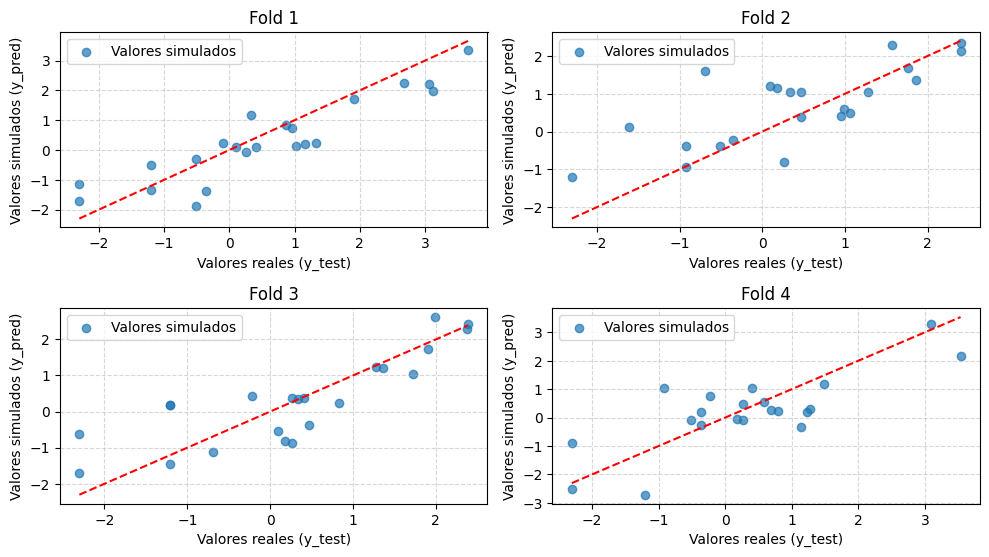

In [118]:
# Gráfica para cada fold
fold_number = 1
plt.figure(figsize=(10, 8))

for train_index, test_index in kf.split(X_m3):
    # Dividir los datos
    X_train, X_test = X_m3.iloc[train_index], X_m3.iloc[test_index]
    y_train, y_test = y_m3.iloc[train_index], y_m3.iloc[test_index]

    # Entrenar el modelo
    model_m3.fit(X_train, y_train)

    # Predicciones
    y_pred_m3 = model_m3.predict(X_test)

    # Gráfica valores reales vs simulados
    plt.subplot(3, 2, fold_number)  # Subgráfica para cada fold
    plt.scatter(y_test, y_pred_m3, alpha=0.7, label='Valores simulados')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
             color='red', linestyle='--')
    plt.xlabel('Valores reales (y_test)')
    plt.ylabel('Valores simulados (y_pred)')
    plt.title(f'Fold {fold_number}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    fold_number += 1

plt.tight_layout()
plt.show()


In [119]:
#validacion cruzada de folds modelo 4

X_m4 = purosdatos[['log_GDP', 'log_Population', 'log_Athlete', 'Education_proportion','Health_proportion']]  # Variables independientes modelo 4
y_m4 = purosdatos['log_Medals']  # Variable dependiente

# Modelo de regresión lineal
model_m4 = LinearRegression()

# Listas para guardar métricas de cada fold
mae_scores = []
mse_scores = []
r2_scores = []

# Ciclo para calcular métricas fold por fold
for fold, (train_index, test_index) in enumerate(kf.split(X_m4), 1):
    # Dividir los datos
    X_train, X_test = X_m4.iloc[train_index], X_m4.iloc[test_index]
    y_train, y_test = y_m4.iloc[train_index], y_m4.iloc[test_index]

    # Entrenar el modelo
    model_m4.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_m4 = model_m4.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred_m4)
    mse = mean_squared_error(y_test, y_pred_m4)
    r2 = r2_score(y_test, y_pred_m4)

    # Guardar métricas
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

    # Imprimir métricas de este fold
    print(f"Fold {fold} de M4:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R^2: {r2:.4f}\n")

# Promedio y desviación estándar de las métricas
print("Resultados globales:")
print(f"Promedio de MAE: {np.mean(mae_scores):.4f} (±{np.std(mae_scores):.4f})")
print(f"Promedio de MSE: {np.mean(mse_scores):.4f} (±{np.std(mse_scores):.4f})")
print(f"Promedio de R^2: {np.mean(r2_scores):.4f} (±{np.std(r2_scores):.4f})")


Fold 1 de M4:
  MAE: 0.5474
  MSE: 0.3957
  R^2: 0.8054

Fold 2 de M4:
  MAE: 0.5633
  MSE: 0.4985
  R^2: 0.5707

Fold 3 de M4:
  MAE: 0.4827
  MSE: 0.3800
  R^2: 0.7100

Fold 4 de M4:
  MAE: 0.5216
  MSE: 0.4201
  R^2: 0.7042

Resultados globales:
Promedio de MAE: 0.5287 (±0.0305)
Promedio de MSE: 0.4236 (±0.0456)
Promedio de R^2: 0.6976 (±0.0835)


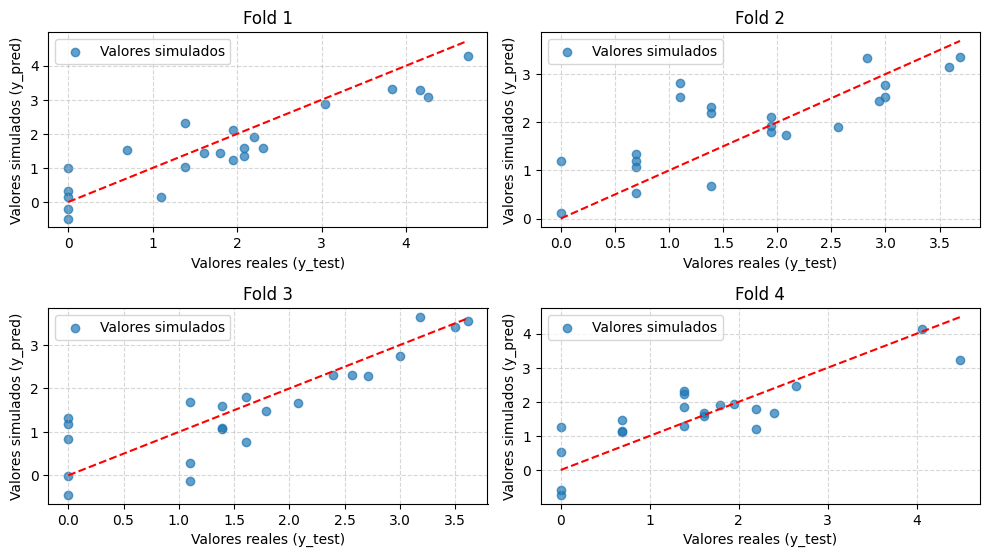

In [120]:

# Gráfica para cada fold
fold_number = 1
plt.figure(figsize=(10, 8))

for train_index, test_index in kf.split(X_m4):
    # Dividir los datos
    X_train, X_test = X_m4.iloc[train_index], X_m4.iloc[test_index]
    y_train, y_test = y_m4.iloc[train_index], y_m4.iloc[test_index]

    # Entrenar el modelo
    model_m4.fit(X_train, y_train)

    # Predicciones
    y_pred_m4 = model_m4.predict(X_test)

    # Gráfica valores reales vs simulados
    plt.subplot(3, 2, fold_number)  # Subgráfica para cada fold
    plt.scatter(y_test, y_pred_m4, alpha=0.7, label='Valores simulados')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
             color='red', linestyle='--')
    plt.xlabel('Valores reales (y_test)')
    plt.ylabel('Valores simulados (y_pred)')
    plt.title(f'Fold {fold_number}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    fold_number += 1

plt.tight_layout()
plt.show()


observamos que no hay un sobreajuste evidente con nuestra validacion cruzada de 4 folds

#Como se observo mejor comportamiento y metricas del modelo 4, ahora intentaremos darle solucion a una ultima pregunta, una variable extra nombrada ya sea corrupcion en los deportes, mala suerte, no tendencia a ganar, podra explicar los errores mas grandes en los modelos como en los paises como MEX, KSA, IND?

#asi que llamamos los codigos del modelo 4 para ajustarlo

In [121]:
# Ajustar el modelo de regresión lineal multivariada
model_top1_4 = smf.ols('log_Medals ~ log_GDP + log_Population + log_Athlete + Education_proportion + Health_proportion', data=purosdatos).fit()

# Imprimir el resumen del modelo
print(model_top1_4.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Medals   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     49.53
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           3.12e-23
Time:                        01:00:19   Log-Likelihood:                -80.021
No. Observations:                  87   AIC:                             172.0
Df Residuals:                      81   BIC:                             186.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.0293 

In [122]:
#solo columna 'log_Med' y 'Country' de df_general
df_general_medallas = df_general[['Country','log_Medals']]
y_pred = model_top1_4.predict(purosdatos)
medallas_sim = y_pred.round(1)

comparar = pd.concat([df_general_medallas, medallas_sim,df_general_medallas['log_Medals']-medallas_sim], axis=1)
#poner titulos a comparar '0' por 'simulacion', '1' por 'diferencia'
comparar.rename(columns={0: 'simulacion', 1: 'diferencia'}, inplace=True)
#solo tomaremos los que tienen 1 punto de diferencia o mas
comparar.sort_values(by='diferencia', ascending=False)

,Country,log_Medals,simulacion,diferencia
1,CHN,4.488636,3.1,1.388636
85,SMR,1.098612,-0.0,1.098612
10,RUS,4.262680,3.2,1.062680
75,JAM,2.197225,1.3,0.897225
83,KGZ,1.098612,0.3,0.798612
...,...,...,...,...
70,BRN,0.000000,1.2,-1.200000
52,PUR,0.000000,1.2,-1.200000
34,RSA,1.098612,2.4,-1.301388
62,LTU,0.000000,1.4,-1.400000


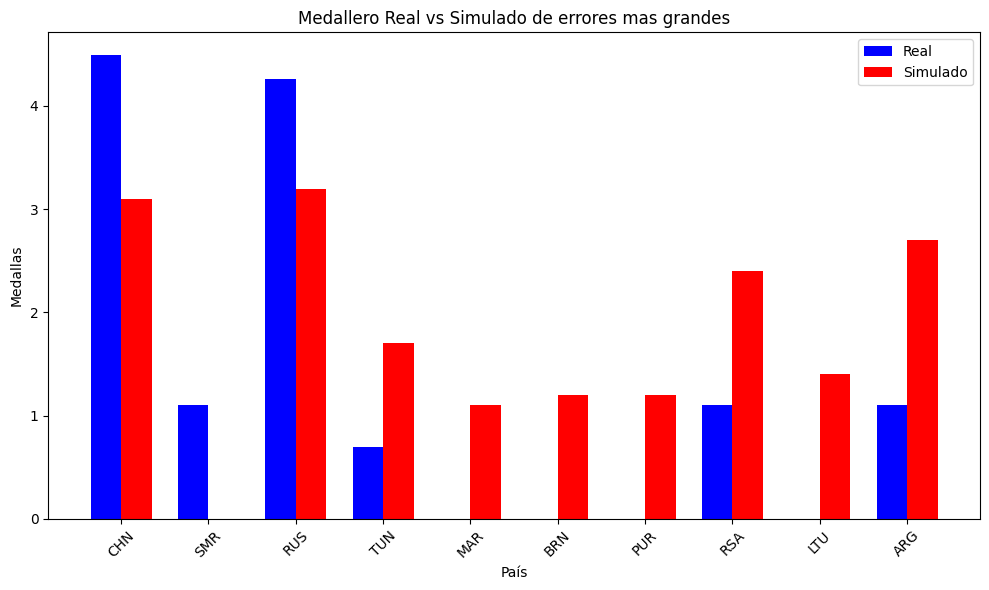

In [123]:
paises = pd.concat([comparar.sort_values(by='diferencia', ascending=False).head(3)['Country'], comparar.sort_values(by='diferencia', ascending=False).tail(7)['Country']], axis=0, ignore_index=True)
valores_reales = pd.concat([comparar.sort_values(by='diferencia', ascending=False).head(3)['log_Medals'], comparar.sort_values(by='diferencia', ascending=False).tail(7)['log_Medals']],axis=0, ignore_index=True)
valores_simulados = pd.concat([comparar.sort_values(by='diferencia', ascending=False).head(3)['simulacion'], comparar.sort_values(by='diferencia', ascending=False).tail(7)['simulacion']],axis=0, ignore_index=True)

x = np.arange(len(paises))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, valores_reales, width, label='Real', color='blue')
plt.bar(x + width/2, valores_simulados, width, label='Simulado', color='red')
plt.xticks(x, paises, rotation=45)
plt.xlabel("País")
plt.ylabel("Medallas")
plt.title("Medallero Real vs Simulado de errores mas grandes")
plt.legend()
plt.tight_layout()
plt.show()

#En este caso vemos 10 paises que superan el punto de diferencia los que estan sobreestimados en la variable extra de efectos fijos se pondra un -1 y los que estan subestimados 1, todos los demas un 0, donde esta variable de efectos fijos representa el apoyo extra o sub que tienen los paises en especifico, esto con justificacion en la ventaja comparativa revelada del articulo citado en nuestro paper

Esta técnica consiste en incluir una variable categórica (o dummies para identificar categorías) que capture diferencias específicas entre individuos, países o cualquier unidad que esté presente en tus datos. Esto puede ayudar a mejorar el modelo porque captura variaciones no observadas entre grupos que podrían estar afectando la relación entre las variables independientes y la dependiente

In [124]:
#si diferencia > 1, variable extra tiene valor de -1 si simulacion > real, 1 si real > simulacion
comparar['extra'] = np.where(comparar['diferencia'] > 1, 1, np.where(comparar['diferencia'] < -1, -1, 0))


In [125]:
#poner -.5 en Mexico, irlanda, arabia saudita y costa de marfil
comparar.loc[comparar['Country'] == 'MEX', 'extra'] = -0.5
comparar.loc[comparar['Country'] == 'IRL', 'extra'] = -0.5
comparar.loc[comparar['Country'] == 'KSA', 'extra'] = -0.5
comparar.loc[comparar['Country'] == 'CIV', 'extra'] = -0.5
#poner .5 a
comparar.loc[comparar['Country'] == 'JAM', 'extra'] = 0.5
comparar.loc[comparar['Country'] == 'KGZ', 'extra'] = 0.5
comparar.loc[comparar['Country'] == 'GBR', 'extra'] = 0.5


<ipython-input-125-9123efc88ffe>:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [126]:
comparar.loc[comparar['Country'] == 'USA', 'extra'] = .5

In [127]:
comparar.head()

,Country,log_Medals,simulacion,diferencia,extra
0,USA,4.727388,4.5,0.227388,0.5
1,CHN,4.488636,3.1,1.388636,1.0
2,JPN,4.060443,4.0,0.060443,0.0
3,GER,3.610918,3.5,0.110918,0.0
4,GBR,4.158883,3.4,0.758883,0.5


In [128]:
#concatenar variable extra a purosdatos por pais
purosdatos = pd.concat([purosdatos, comparar['extra']], axis=1)

In [129]:
purosdatos.head()

,GDP,log_GDP,Total,MED,log_Med,log_Medals,Population,log_Population,Athlete,log_Athlete,Pop_over_65,Urban Pop,Military_proportion,Education_proportion,Health_proportion,Life E,calorias_per_capita_per_dia,Corruption,extra
0,2.132295e+13,30.690805,113,39.0,3.663562,4.727388,3.315269e+08,19.619220,613,6.418365,16.223400,82.664,3.696010,5.435440,18.756220,76.980488,3891.9998,1.038217,0.5
1,1.468774e+13,30.318035,89,34.3,3.535145,4.488636,1.411100e+09,21.067635,406,6.006353,12.598262,61.428,1.756699,3.572956,5.593597,78.077000,3322.0000,-0.070957,1.0
2,5.055587e+12,29.251515,58,22.1,3.095578,4.060443,1.262610e+08,18.653862,552,6.313548,29.583178,91.782,1.017830,3.306290,11.000000,84.560000,2674.0000,1.463934,0.0
3,3.887727e+12,28.988846,37,10.9,2.388763,3.610918,8.316087e+07,18.236287,425,6.052089,21.963734,77.453,1.373586,5.587590,12.692553,81.041463,3642.0000,1.825714,0.0
4,2.697807e+12,28.623460,64,21.4,3.063391,4.158883,6.708123e+07,18.021415,376,5.929589,18.722512,83.903,2.156778,5.497700,12.158634,80.351220,3373.9998,1.660060,0.5


#realizar nuevamente el modelo 4 con la variable de ajuste


In [130]:
model_top1_4_adjusted = smf.ols('log_Medals ~ log_GDP + log_Population + log_Athlete + Education_proportion + Health_proportion + extra',
                                data=purosdatos).fit()

# Imprimir el resumen del modelo
print(model_top1_4_adjusted.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Medals   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     140.7
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           2.22e-40
Time:                        01:00:20   Log-Likelihood:                -34.490
No. Observations:                  87   AIC:                             82.98
Df Residuals:                      80   BIC:                             100.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.5312 

In [131]:
#mae, mse y r2 del modelo 4 ajustado
mae_adjusted = mean_absolute_error(purosdatos['log_Medals'], model_top1_4_adjusted.predict(purosdatos))
mse_adjusted = mean_squared_error(purosdatos['log_Medals'], model_top1_4_adjusted.predict(purosdatos))
r2_adjusted = r2_score(purosdatos['log_Medals'], model_top1_4_adjusted.predict(purosdatos))
aic_adjusted = model_top1_4_adjusted.aic
bic_adjusted = model_top1_4_adjusted.bic

print(f"MAE del modelo 4 ajustado: {mae_adjusted:.4f}")
print(f"MSE del modelo 4 ajustado: {mse_adjusted:.4f}")
print(f"R^2 del modelo 4 ajustado: {r2_adjusted:.4f}")
print(f"AIC del modelo 4 ajustado: {aic_adjusted:.4f}")
print(f"BIC del modelo 4 ajustado: {bic_adjusted:.4f}")

MAE del modelo 4 ajustado: 0.2883
MSE del modelo 4 ajustado: 0.1294
R^2 del modelo 4 ajustado: 0.9135
AIC del modelo 4 ajustado: 82.9795
BIC del modelo 4 ajustado: 100.2409


#tabla comparativa final

In [132]:
#solo columna 'log_Med' y 'Country' de df_general
df_general_medallas = df_general[['Country','log_Medals']]
y_pred = model_top1_4_adjusted.predict(purosdatos)
medallas_sim = y_pred.round(2)

comparar = pd.concat([df_general_medallas, medallas_sim,df_general_medallas['log_Medals']-medallas_sim], axis=1)
#poner titulos a comparar '0' por 'simulacion', '1' por 'diferencia'
comparar.rename(columns={0: 'simulacion', 1: 'diferencia'}, inplace=True)

In [133]:
comparar.sort_values(by='diferencia', ascending=False)

,Country,log_Medals,simulacion,diferencia
15,INA,1.609438,0.91,0.699438
31,PHI,1.386294,0.69,0.696294
84,BER,0.000000,-0.61,0.610000
46,QAT,1.098612,0.54,0.558612
73,GEO,2.079442,1.55,0.529442
...,...,...,...,...
25,NGR,0.693147,1.31,-0.616853
23,THA,0.693147,1.38,-0.686853
42,GRE,1.386294,2.14,-0.753706
37,ROU,1.386294,2.20,-0.813706


In [134]:
#SI en comparar, en la columna simulacion hay un numero menor que 0 , ponerlo 0
comparar.loc[comparar['simulacion'] < 0, 'simulacion'] = 0

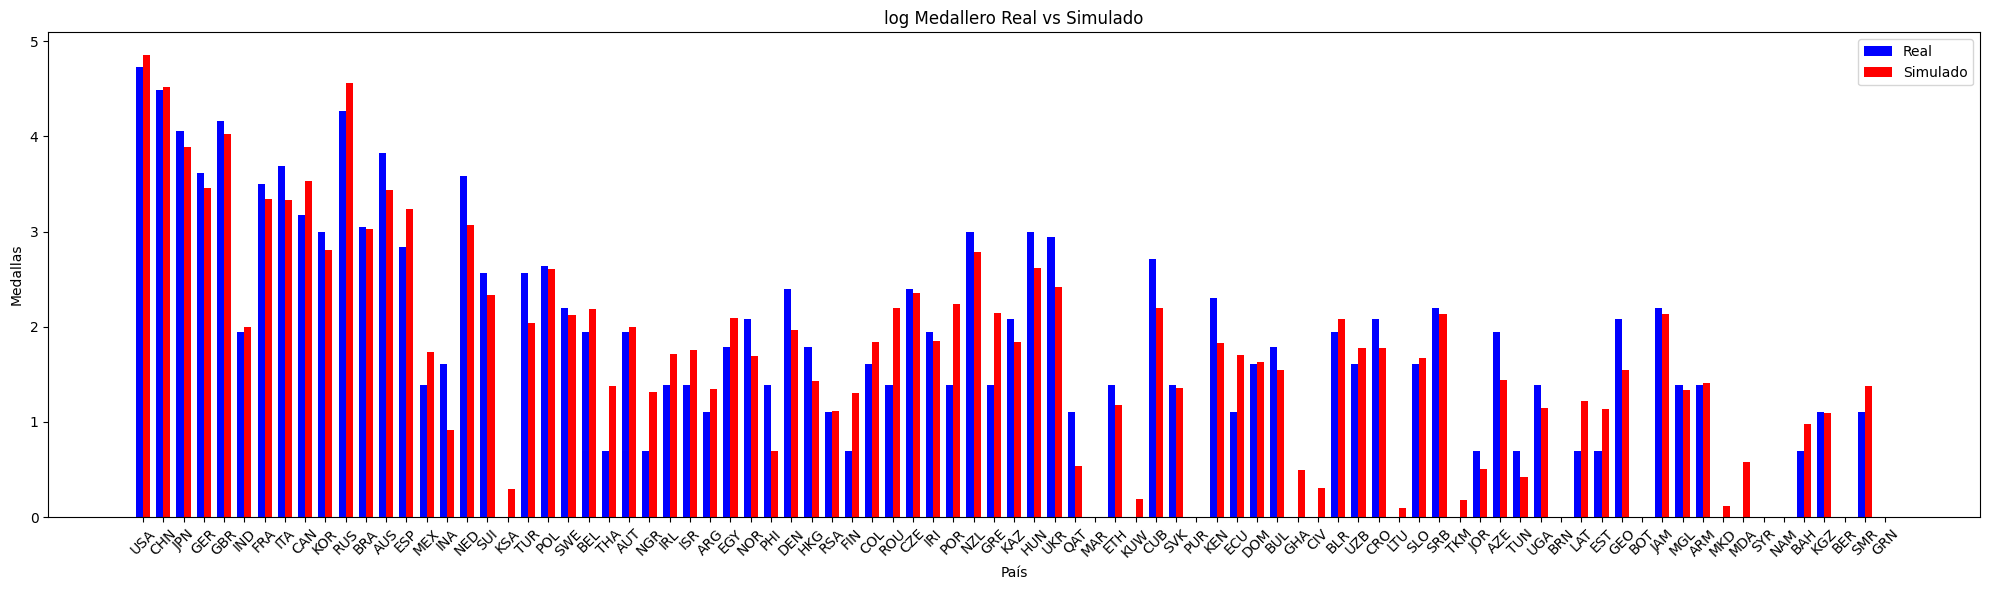

In [135]:
paises = comparar['Country']
valores_reales = comparar['log_Medals']
valores_simulados = comparar['simulacion']

x = np.arange(len(paises))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(20, 6))
plt.bar(x - width/2, valores_reales, width, label='Real', color='blue')
plt.bar(x + width/2, valores_simulados, width, label='Simulado', color='red')
plt.xticks(x, paises, rotation=45)
plt.xlabel("País")
plt.ylabel("Medallas")
plt.title("log Medallero Real vs Simulado")
plt.legend()
plt.tight_layout()
plt.show()

In [136]:
#comparacion reales, hacer exponenciales log_medals y medallas sim
comparar['log_Medals'] = np.exp(comparar['log_Medals'])
comparar['simulacion'] = np.exp(comparar['simulacion']).round(0)
comparar['diferencia'] = comparar['log_Medals'] - comparar['simulacion']
comparar

,Country,log_Medals,simulacion,diferencia
0,USA,113.0,128.0,-1.500000e+01
1,CHN,89.0,92.0,-3.000000e+00
2,JPN,58.0,49.0,9.000000e+00
3,GER,37.0,32.0,5.000000e+00
4,GBR,64.0,56.0,8.000000e+00
...,...,...,...,...
82,BAH,2.0,3.0,-1.000000e+00
83,KGZ,3.0,3.0,4.440892e-16
84,BER,1.0,1.0,0.000000e+00
85,SMR,3.0,4.0,-1.000000e+00


In [137]:
#MAE, MSE y R2 reales
mae_real = mean_absolute_error(comparar['log_Medals'], comparar['simulacion'])
mse_real = mean_squared_error(comparar['log_Medals'], comparar['simulacion'])
r2_real = r2_score(comparar['log_Medals'], comparar['simulacion'])

print(f"MAE del modelo 4 ajustado reales: {mae_real:.4f}")
print(f"MSE del modelo 4 ajustado reales: {mse_real:.4f}")
print(f"R^2 del modelo 4 ajustado reales: {r2_real:.4f}")

MAE del modelo 4 ajustado reales: 2.8046
MSE del modelo 4 ajustado reales: 25.2874
R^2 del modelo 4 ajustado reales: 0.9335


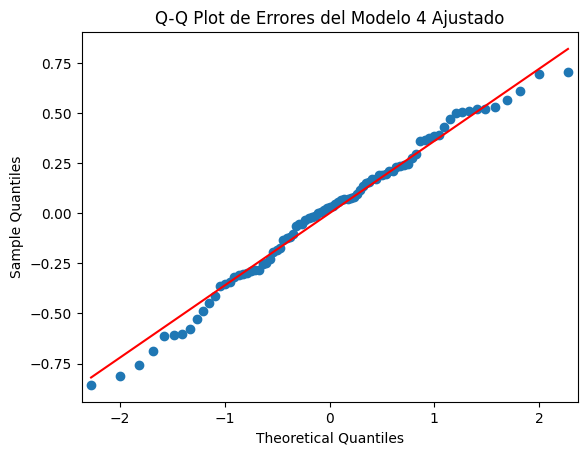

In [138]:
#Q-Q plot de errores de modelo 4 ajustado
sm.qqplot(model_top1_4_adjusted.resid, line='s')
plt.title('Q-Q Plot de Errores del Modelo 4 Ajustado')
plt.show()

In [139]:
#k-folds validacion cruzada de k-folds
X_m4_adj = purosdatos[['log_GDP', 'log_Population', 'log_Athlete', 'Education_proportion','Health_proportion','extra']]  # Variables independientes modelo 3
y_m4_adj = purosdatos['log_Med']  # Variable dependiente

# Configuración de K-Fold (4 folds)
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Modelo de regresión lineal
model_m4_adj = LinearRegression()

# Listas para guardar métricas de cada fold
mae_scores = []
mse_scores = []
r2_scores = []

# Ciclo para calcular métricas fold por fold
for fold, (train_index, test_index) in enumerate(kf.split(X_m3), 1):
    # Dividir los datos
    X_train, X_test = X_m4_adj.iloc[train_index], X_m4_adj.iloc[test_index]
    y_train, y_test = y_m4_adj.iloc[train_index], y_m4_adj.iloc[test_index]

    #Agregar constante a X
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    # Entrenar el modelo
    model_m4_adj.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_m4_adj = model_m4_adj.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred_m4_adj)
    mse = mean_squared_error(y_test, y_pred_m4_adj)
    r2 = r2_score(y_test, y_pred_m4_adj)

    # Guardar métricas
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

    # Imprimir métricas de este fold
    print(f"Fold {fold} de M3:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R^2: {r2:.4f}\n")

# Promedio y desviación estándar de las métricas
print("Resultados globales:")
print(f"Promedio de MAE: {np.mean(mae_scores):.4f} (±{np.std(mae_scores):.4f})")
print(f"Promedio de MSE: {np.mean(mse_scores):.4f} (±{np.std(mse_scores):.4f})")
print(f"Promedio de R^2: {np.mean(r2_scores):.4f} (±{np.std(r2_scores):.4f})")


Fold 1 de M3:
  MAE: 0.4425
  MSE: 0.3771
  R^2: 0.8539

Fold 2 de M3:
  MAE: 0.5836
  MSE: 0.5301
  R^2: 0.6441

Fold 3 de M3:
  MAE: 0.4762
  MSE: 0.3681
  R^2: 0.7983

Fold 4 de M3:
  MAE: 0.5774
  MSE: 0.5303
  R^2: 0.7333

Resultados globales:
Promedio de MAE: 0.5199 (±0.0618)
Promedio de MSE: 0.4514 (±0.0789)
Promedio de R^2: 0.7574 (±0.0781)


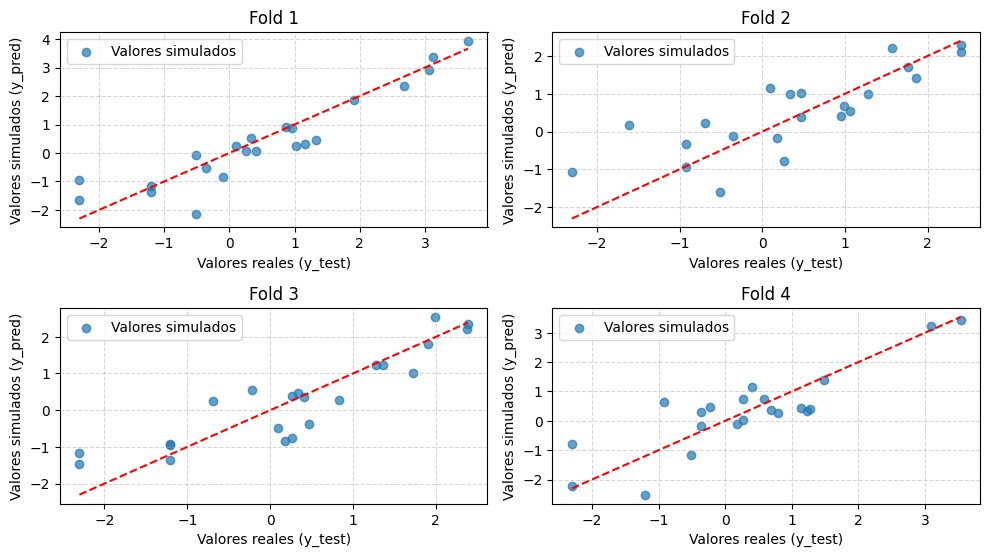

In [140]:
# Gráfica para cada fold
fold_number = 1
plt.figure(figsize=(10, 8))

for train_index, test_index in kf.split(X_m4):
    # Dividir los datos
    X_train, X_test = X_m4_adj.iloc[train_index], X_m4_adj.iloc[test_index]
    y_train, y_test = y_m4_adj.iloc[train_index], y_m4_adj.iloc[test_index]

    #Agregar constante a X
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    # Entrenar el modelo
    model_m4_adj.fit(X_train, y_train)

    # Predicciones
    y_pred_m4_adj = model_m4_adj.predict(X_test)

    # Gráfica valores reales vs simulados
    plt.subplot(3, 2, fold_number)  # Subgráfica para cada fold
    plt.scatter(y_test, y_pred_m4_adj, alpha=0.7, label='Valores simulados')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
             color='red', linestyle='--')
    plt.xlabel('Valores reales (y_test)')
    plt.ylabel('Valores simulados (y_pred)')
    plt.title(f'Fold {fold_number}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    fold_number += 1

plt.tight_layout()
plt.show()

#vemos que las variables ancla no muestran relevancia importante, ajustamos modelos elasticos para penalizar L1 y L2

In [141]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Definir los rangos de valores para alpha y L1_wt
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10],
              'l1_ratio': [0.1, 0.5, 0.9]}  # L1_ratio = L1_wt / (L1_wt + L2_wt)

# Crear el modelo ElasticNet
elastic_net = ElasticNet()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)

# Ajustar el modelo a los datos
grid_search.fit(X_m4_adj, y_m4_adj)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

Mejores parámetros: {'alpha': 0.01, 'l1_ratio': 0.9}


In [142]:

# Creamos un nuevo modelo ElasticNet con los mejores parámetros
best_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])

# Ajustamos el modelo a todos los datos de entrenamiento
best_model.fit(X_m4_adj, y_m4_adj)

# Hacemos predicciones en los datos de prueba
y_pred = best_model.predict(X_m4_adj)

#obtenemos el intercepto
print("Intercepto:", best_model.intercept_)

# Obtenemos un resumen de los coeficientes
print("Coeficientes del modelo final:")
print(best_model.coef_)


Intercepto: -2.3319653184439204
Coeficientes del modelo final:
[ 0.         -0.03922874  0.89108243 -0.22113757  0.10287546  1.12999216]


Metiendo lo que son las penalizaciones L1 y L2 nos damos cuenta que le restan importancia aun mas a las variables ancla con las que se fueron haciendo las pruebas de los modelos, esto porque el logaritmo de los atletas participantes ya explica el aporte de la poblacion y del gdp al desarrollar mas atletas con mejor calidad de centros deportivos, una mayor grueso de poblacion significa un semillero mas grande para la seleccion de atletas, de misma forma el porcetanje que los paises invierten en salud y educacion representan unas finanzas sanas que buscan desarrollo deportivo y asi tener mas prestigio, no simplemente es que no sean relevantes sino que la combinacion de las variables de interes llega a explicar de forma mas minuciosa la relacion que hay entre el desarrollo economico y el desempeño olipico, lo que el intercepto representa es lo que nuestras variables no puedes explicar como por ejemplo la Ventaja Comparativa Revelada que Investiga el rendimiento de cada país e intenta identificar los determinantes de este rendimiento en cada deporte, la VCR de cada país se explica por variables geográficas, biológicas y económicas de los países participantes

In [143]:
model_top1_4_adjusted_2 = smf.ols('log_Medals ~ log_Athlete + Education_proportion + Health_proportion + extra',
                                data=purosdatos).fit()

# Imprimir el resumen del modelo
print(model_top1_4_adjusted_2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Medals   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     213.3
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           1.76e-42
Time:                        01:00:23   Log-Likelihood:                -35.067
No. Observations:                  87   AIC:                             80.13
Df Residuals:                      82   BIC:                             92.46
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.3591 

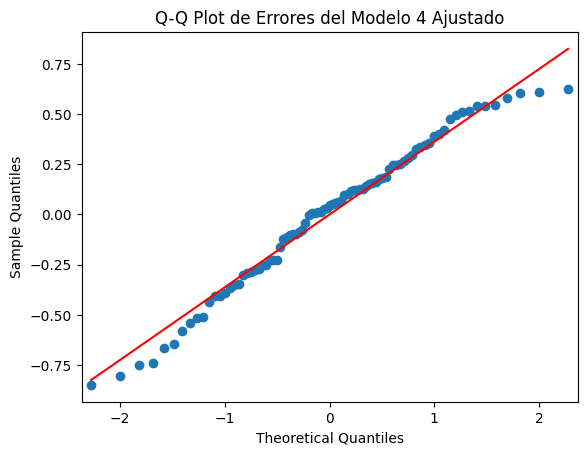

In [144]:
#Q-Q plot de errores de modelo 4 ajustado
sm.qqplot(model_top1_4_adjusted_2.resid, line='s')
plt.title('Q-Q Plot de Errores del Modelo 4 Ajustado')
plt.show()

In [145]:
#k-folds validacion cruzada de k-folds
X_m4_adj_2 = purosdatos[['log_Athlete', 'Education_proportion','Health_proportion','extra']]  # Variables independientes modelo 3
y_m4_adj_2 = purosdatos['log_Med']  # Variable dependiente

# Configuración de K-Fold (4 folds)
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Modelo de regresión lineal
model_m4_adj_2 = LinearRegression()

# Listas para guardar métricas de cada fold
mae_scores = []
mse_scores = []
r2_scores = []

# Ciclo para calcular métricas fold por fold
for fold, (train_index, test_index) in enumerate(kf.split(X_m3), 1):
    # Dividir los datos
    X_train, X_test = X_m4_adj_2.iloc[train_index], X_m4_adj_2.iloc[test_index]
    y_train, y_test = y_m4_adj_2.iloc[train_index], y_m4_adj_2.iloc[test_index]

    #Agregar constante a X
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    # Entrenar el modelo
    model_m4_adj_2.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_m4_adj_2 = model_m4_adj_2.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred_m4_adj_2)
    mse = mean_squared_error(y_test, y_pred_m4_adj_2)
    r2 = r2_score(y_test, y_pred_m4_adj_2)

    # Guardar métricas
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

    # Imprimir métricas de este fold
    print(f"Fold {fold} de M3:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R^2: {r2:.4f}\n")

# Promedio y desviación estándar de las métricas
print("Resultados globales despues de l1 y l2:")
print(f"Promedio de MAE: {np.mean(mae_scores):.4f} (±{np.std(mae_scores):.4f})")
print(f"Promedio de MSE: {np.mean(mse_scores):.4f} (±{np.std(mse_scores):.4f})")
print(f"Promedio de R^2: {np.mean(r2_scores):.4f} (±{np.std(r2_scores):.4f})")

Fold 1 de M3:
  MAE: 0.4527
  MSE: 0.3706
  R^2: 0.8564

Fold 2 de M3:
  MAE: 0.5699
  MSE: 0.4989
  R^2: 0.6651

Fold 3 de M3:
  MAE: 0.4074
  MSE: 0.2785
  R^2: 0.8474

Fold 4 de M3:
  MAE: 0.5784
  MSE: 0.5341
  R^2: 0.7314

Resultados globales despues de l1 y l2:
Promedio de MAE: 0.5021 (±0.0739)
Promedio de MSE: 0.4205 (±0.1021)
Promedio de R^2: 0.7751 (±0.0804)


finalmente este modelo tiene mejor bondad de ajuste gracias a las decisiones que se tomaron despues del modelo elastico, dandonos un mejor comportamiento por poco en la validacion cruzada

In [146]:
#solo columna 'log_Med' y 'Country' de df_general
df_general_medallas = df_general[['Country','Total']]
y_pred = model_top1_4_adjusted_2.predict(purosdatos)
medallas_sim_2 = (np.exp(y_pred)).round(0)

comparar_2 = pd.concat([df_general_medallas, medallas_sim_2,df_general_medallas['Total']-medallas_sim_2], axis=1)
#poner titulos a comparar '0' por 'simulacion', '1' por 'diferencia'
comparar_2.rename(columns={0: 'simulacion', 1: 'diferencia'}, inplace=True)

In [147]:
comparar_2.sort_values(by='diferencia', ascending=False)

,Country,Total,simulacion,diferencia
12,AUS,46,31.0,15.0
16,NED,36,22.0,14.0
7,ITA,40,28.0,12.0
2,JPN,58,49.0,9.0
45,UKR,19,11.0,8.0
...,...,...,...,...
13,ESP,17,25.0,-8.0
1,CHN,89,98.0,-9.0
8,CAN,24,34.0,-10.0
0,USA,113,133.0,-20.0


In [148]:
#MAE MSE y R2 de comparar_2
mae_2 = mean_absolute_error(comparar_2['Total'], comparar_2['simulacion'])
mse_2 = mean_squared_error(comparar_2['Total'], comparar_2['simulacion'])
r2_2 = r2_score(comparar_2['Total'], comparar_2['simulacion'])

print(f"MAE del modelo 4 ajustado reales: {mae_2:.4f}")
print(f"MSE del modelo 4 ajustado reales: {mse_2:.4f}")
print(f"R^2 del modelo 4 ajustado reales: {r2_2:.4f}")

MAE del modelo 4 ajustado reales: 2.8851
MSE del modelo 4 ajustado reales: 26.5402
R^2 del modelo 4 ajustado reales: 0.9303


$W = \alpha + \sum_{i=1}^{n} \delta_i X_i + \sum_{i=1}^{m} \gamma_i Z_i + \varepsilon$